In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, AgglomerativeClustering
import scipy.cluster.hierarchy as sch
from sklearn.preprocessing import scale
import warnings
warnings.filterwarnings('ignore')

In [2]:
from google.colab import files
uploaded = files.upload()

Saving wine.csv to wine.csv


In [3]:
raw_data = pd.read_csv('wine.csv')
raw_data.head()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [4]:
raw_data.describe()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [5]:
#Dropping 'Type' as it is a classifier for our dataset.
data = raw_data.drop('Type',axis=1)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Alcohol          178 non-null    float64
 1   Malic            178 non-null    float64
 2   Ash              178 non-null    float64
 3   Alcalinity       178 non-null    float64
 4   Magnesium        178 non-null    int64  
 5   Phenols          178 non-null    float64
 6   Flavanoids       178 non-null    float64
 7   Nonflavanoids    178 non-null    float64
 8   Proanthocyanins  178 non-null    float64
 9   Color            178 non-null    float64
 10  Hue              178 non-null    float64
 11  Dilution         178 non-null    float64
 12  Proline          178 non-null    int64  
dtypes: float64(11), int64(2)
memory usage: 18.2 KB


In [7]:
data.isna().sum()

Alcohol            0
Malic              0
Ash                0
Alcalinity         0
Magnesium          0
Phenols            0
Flavanoids         0
Nonflavanoids      0
Proanthocyanins    0
Color              0
Hue                0
Dilution           0
Proline            0
dtype: int64

In [8]:
data.duplicated().sum()

0

#EDA

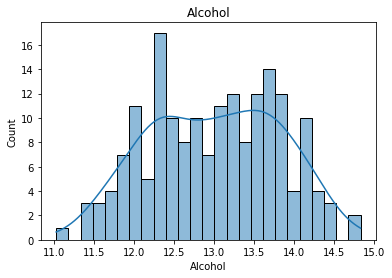

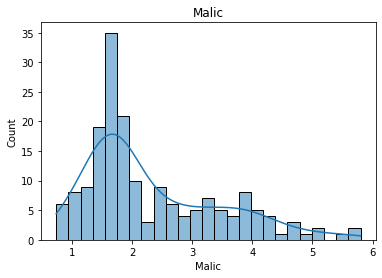

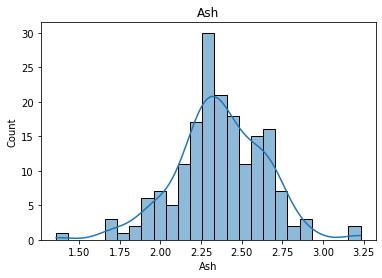

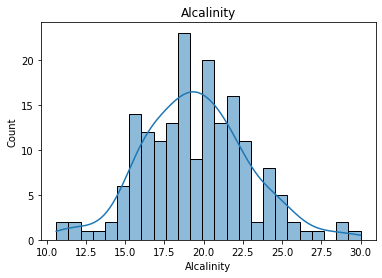

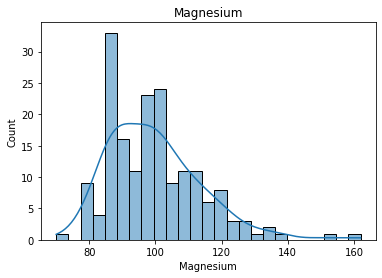

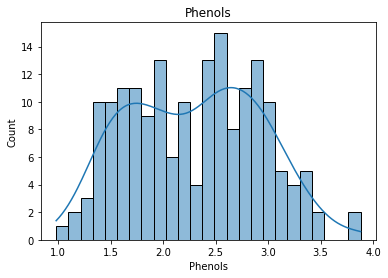

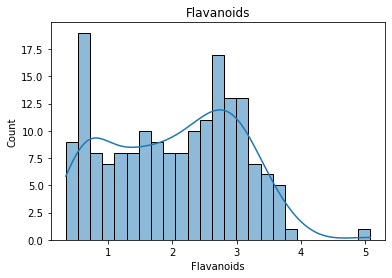

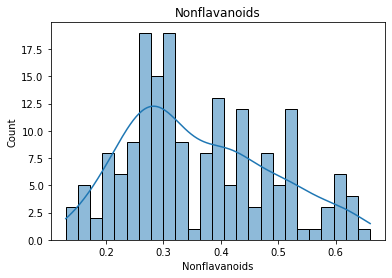

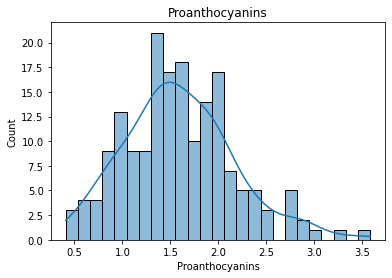

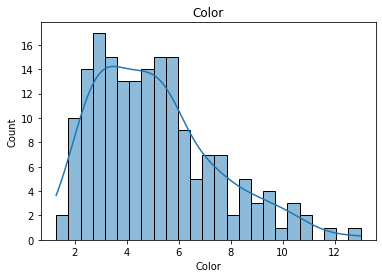

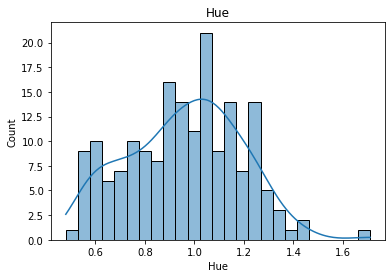

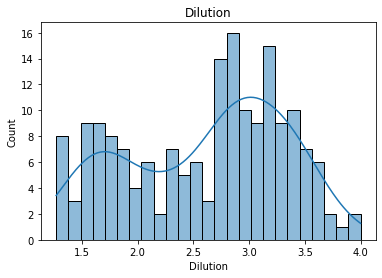

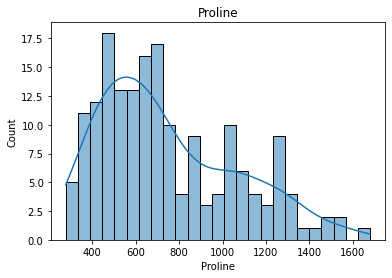

In [9]:
data1 = data.copy()
for i in data1.columns:
    sns.histplot(data1[i],kde=True,bins=25)
    plt.title(i)
    plt.show()

#Outliers Detection

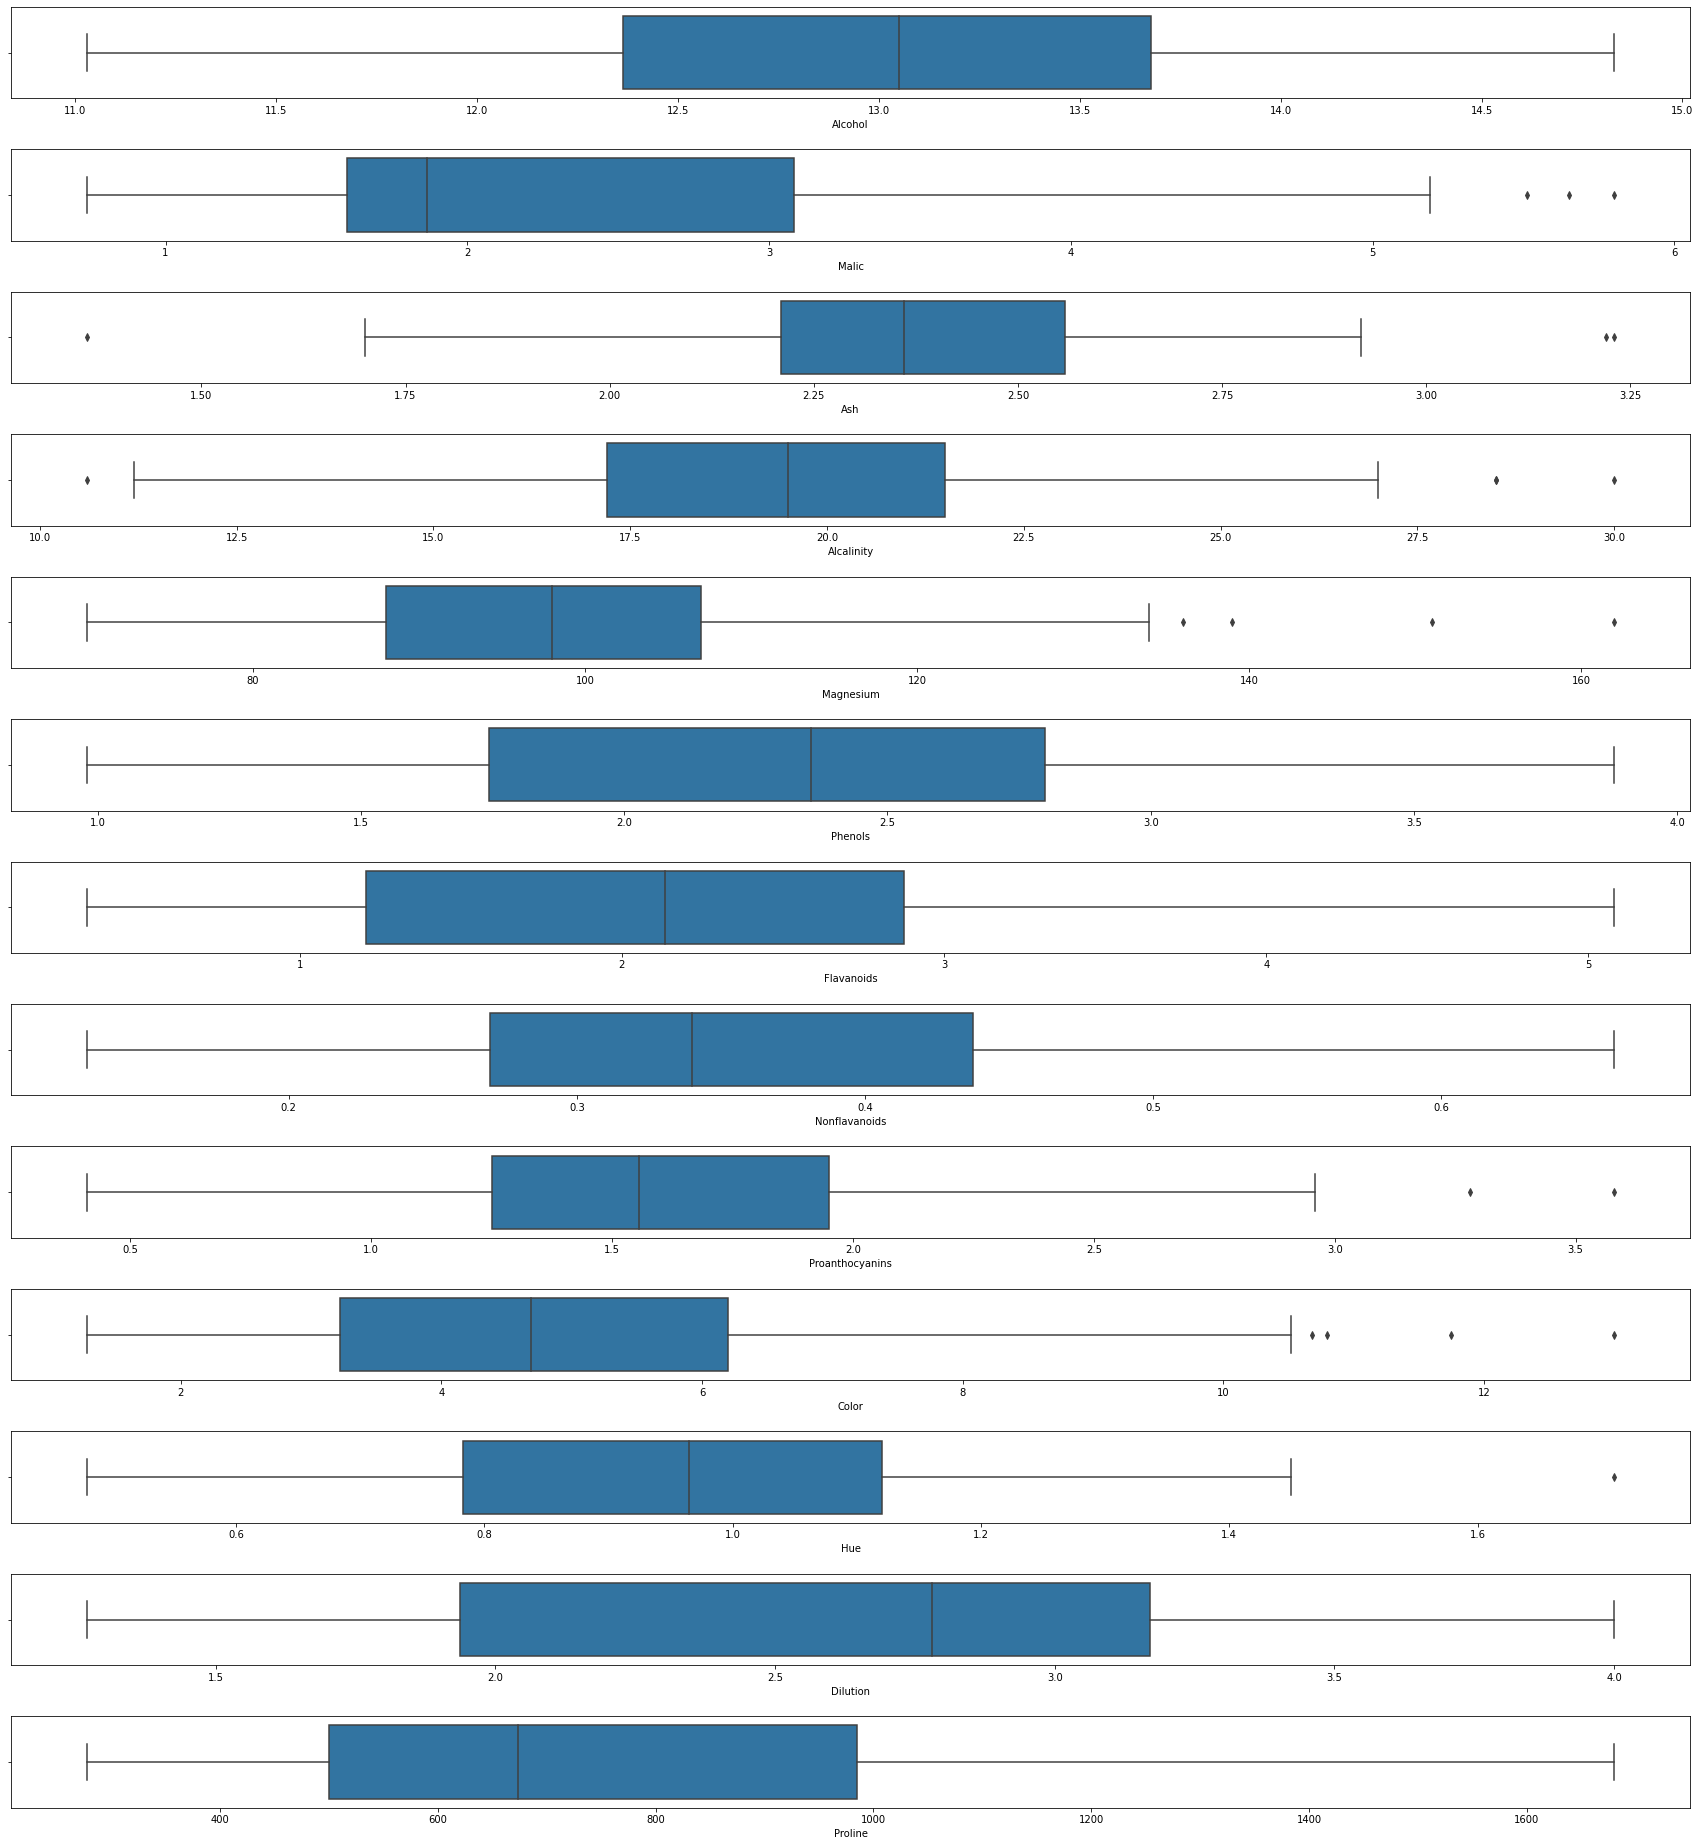

In [10]:
df=data1.copy() 
fig, axes=plt.subplots(13,1,figsize=(24,26),sharex=False,sharey=False)
sns.boxplot(x='Alcohol',data=df,ax=axes[0])
sns.boxplot(x='Malic',data=df,ax=axes[1])
sns.boxplot(x='Ash',data=df,ax=axes[2])
sns.boxplot(x='Alcalinity',data=df,ax=axes[3])
sns.boxplot(x='Magnesium',data=df,ax=axes[4])
sns.boxplot(x='Phenols',data=df,ax=axes[5])
sns.boxplot(x='Flavanoids',data=df,ax=axes[6])
sns.boxplot(x='Nonflavanoids',data=df,ax=axes[7])
sns.boxplot(x='Proanthocyanins',data=df,ax=axes[8])
sns.boxplot(x='Color',data=df,ax=axes[9])
sns.boxplot(x='Hue',data=df,ax=axes[10])
sns.boxplot(x='Dilution',data=df,ax=axes[11])
sns.boxplot(x='Proline',data=df,ax=axes[12])
plt.tight_layout(pad=2.0)
plt.show()

#Data Visualization

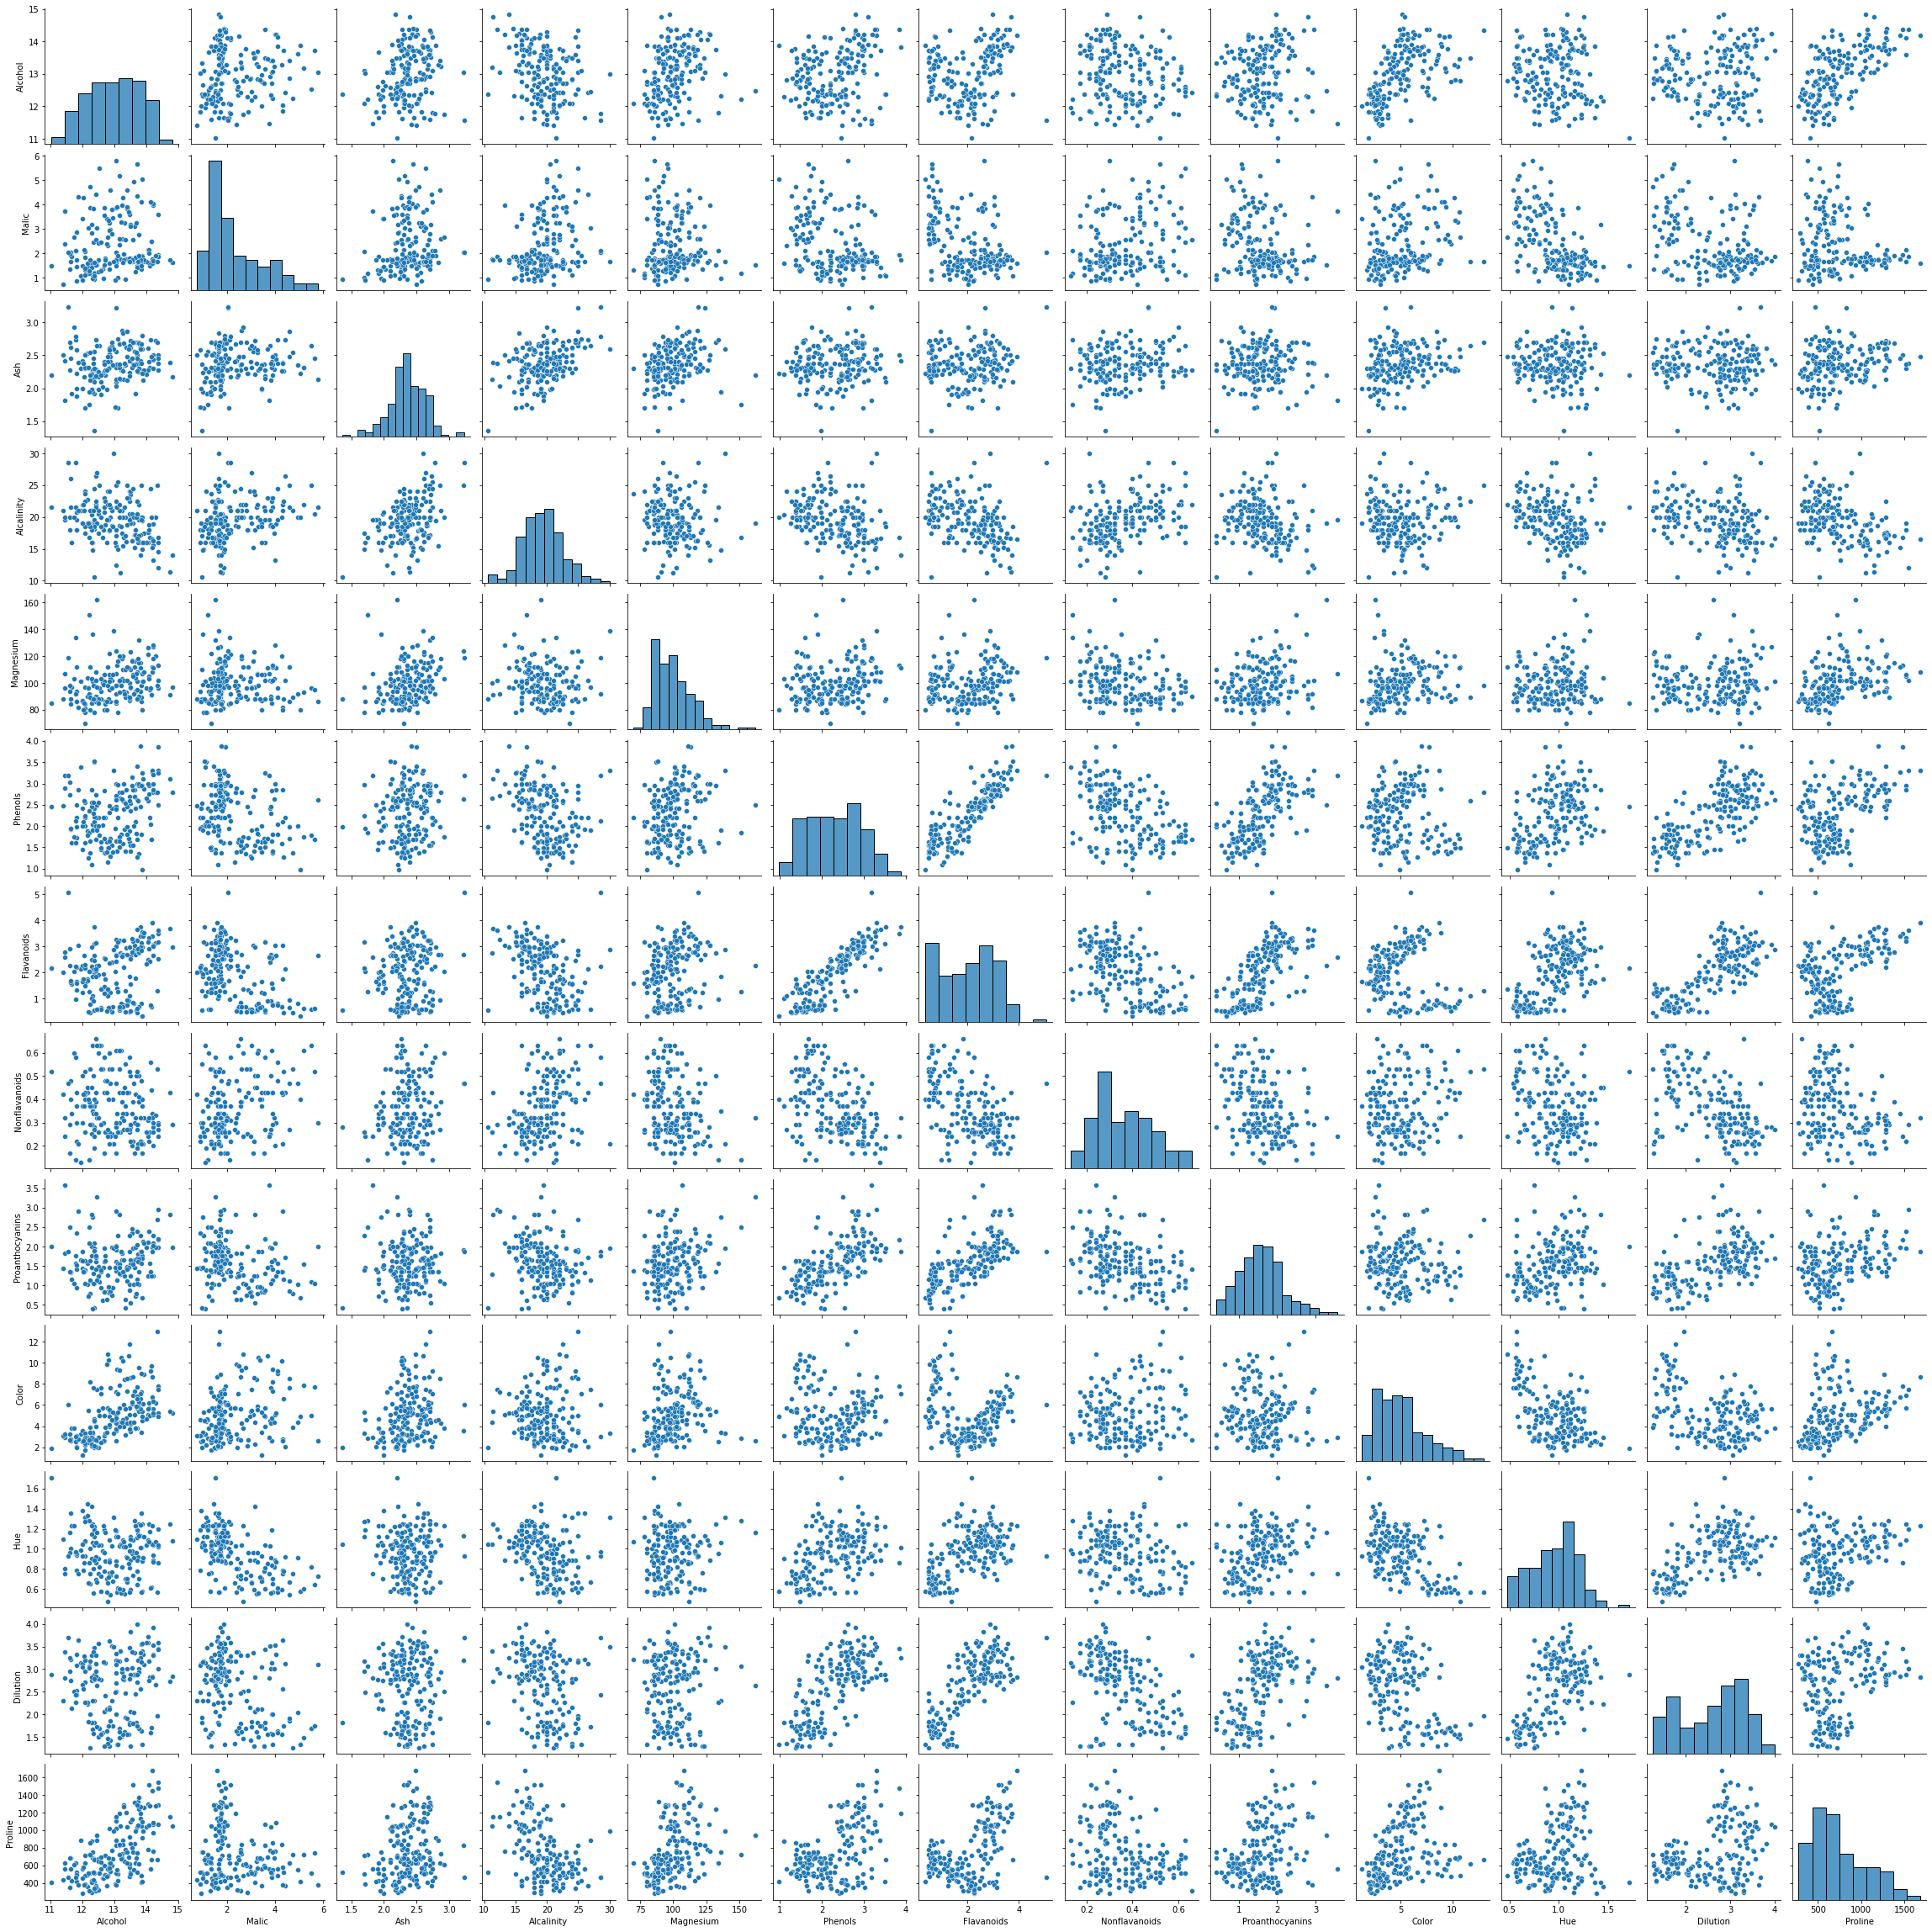

In [11]:
sns.pairplot(df)
plt.show()

#Data Featurizing

**1) Standardize our Data**

In [12]:
from sklearn.preprocessing import StandardScaler

data_std = StandardScaler().fit_transform(data1)
data_std.shape

(178, 13)

**2) Normalize our Data**

In [13]:
from sklearn.preprocessing import MinMaxScaler

data_nor = MinMaxScaler().fit_transform(data1)
data_nor.shape

(178, 13)

In [14]:
# Converting data to numpy array
array = data1.values
array

array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
        1.065e+03],
       [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
        1.050e+03],
       [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
        1.185e+03],
       ...,
       [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
        8.350e+02],
       [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
        8.400e+02],
       [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
        5.600e+02]])

In [15]:
# Normalizing the numerical data 
array_norm = scale(array)
array_norm

array([[ 1.51861254, -0.5622498 ,  0.23205254, ...,  0.36217728,
         1.84791957,  1.01300893],
       [ 0.24628963, -0.49941338, -0.82799632, ...,  0.40605066,
         1.1134493 ,  0.96524152],
       [ 0.19687903,  0.02123125,  1.10933436, ...,  0.31830389,
         0.78858745,  1.39514818],
       ...,
       [ 0.33275817,  1.74474449, -0.38935541, ..., -1.61212515,
        -1.48544548,  0.28057537],
       [ 0.20923168,  0.22769377,  0.01273209, ..., -1.56825176,
        -1.40069891,  0.29649784],
       [ 1.39508604,  1.58316512,  1.36520822, ..., -1.52437837,
        -1.42894777, -0.59516041]])

#Principal Component Analysis (PCA)

**1) For Standardized Data**

In [16]:
# Applying PCA Fit Transform to dataset
pca = PCA(n_components=13)

wine_pca = pca.fit_transform(data_std)
wine_pca

array([[ 3.31675081e+00, -1.44346263e+00, -1.65739045e-01, ...,
        -4.51563395e-01,  5.40810414e-01, -6.62386309e-02],
       [ 2.20946492e+00,  3.33392887e-01, -2.02645737e+00, ...,
        -1.42657306e-01,  3.88237741e-01,  3.63650247e-03],
       [ 2.51674015e+00, -1.03115130e+00,  9.82818670e-01, ...,
        -2.86672847e-01,  5.83573183e-04,  2.17165104e-02],
       ...,
       [-2.67783946e+00, -2.76089913e+00, -9.40941877e-01, ...,
         5.12492025e-01,  6.98766451e-01,  7.20776948e-02],
       [-2.38701709e+00, -2.29734668e+00, -5.50696197e-01, ...,
         2.99821968e-01,  3.39820654e-01, -2.18657605e-02],
       [-3.20875816e+00, -2.76891957e+00,  1.01391366e+00, ...,
        -2.29964331e-01, -1.88787963e-01, -3.23964720e-01]])

In [17]:
var = pca.explained_variance_ratio_
var

array([0.36198848, 0.1920749 , 0.11123631, 0.0706903 , 0.06563294,
       0.04935823, 0.04238679, 0.02680749, 0.02222153, 0.01930019,
       0.01736836, 0.01298233, 0.00795215])

In [18]:
# Cummulative variance of each PCA
var1 = np.cumsum(np.round(var,4)*100)
var1

array([ 36.2 ,  55.41,  66.53,  73.6 ,  80.16,  85.1 ,  89.34,  92.02,
        94.24,  96.17,  97.91,  99.21, 100.01])

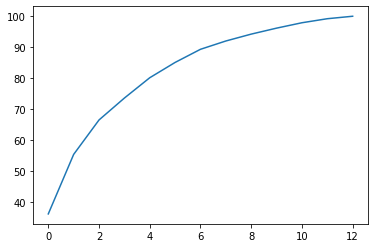

In [19]:
plt.plot(var1)

In [20]:
final_df = pd.concat([raw_data['Type'],pd.DataFrame(wine_pca[:,0:3],columns=['PC1','PC2','PC3'])],axis=1)
final_df.head()

,Type,PC1,PC2,PC3
0,1,3.316751,-1.443463,-0.165739
1,1,2.209465,0.333393,-2.026457
2,1,2.516740,-1.031151,0.982819
3,1,3.757066,-2.756372,-0.176192
4,1,1.008908,-0.869831,2.026688


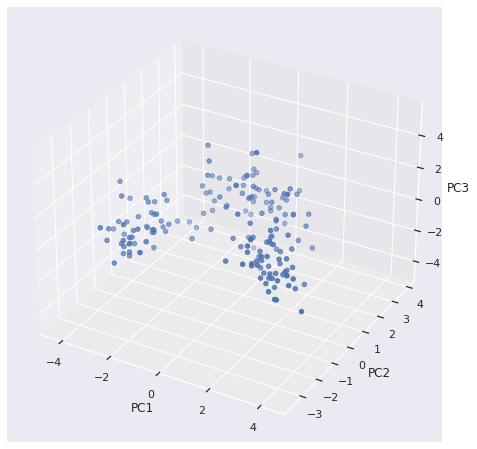

In [21]:
from mpl_toolkits.mplot3d import Axes3D

sns.set(style = "darkgrid")

fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111, projection = '3d')

x = final_df['PC1']
y = final_df['PC2']
z = final_df['PC3']

ax.set_xlabel("PC1")
ax.set_ylabel("PC2")
ax.set_zlabel("PC3")

ax.scatter(x, y, z)

plt.show()

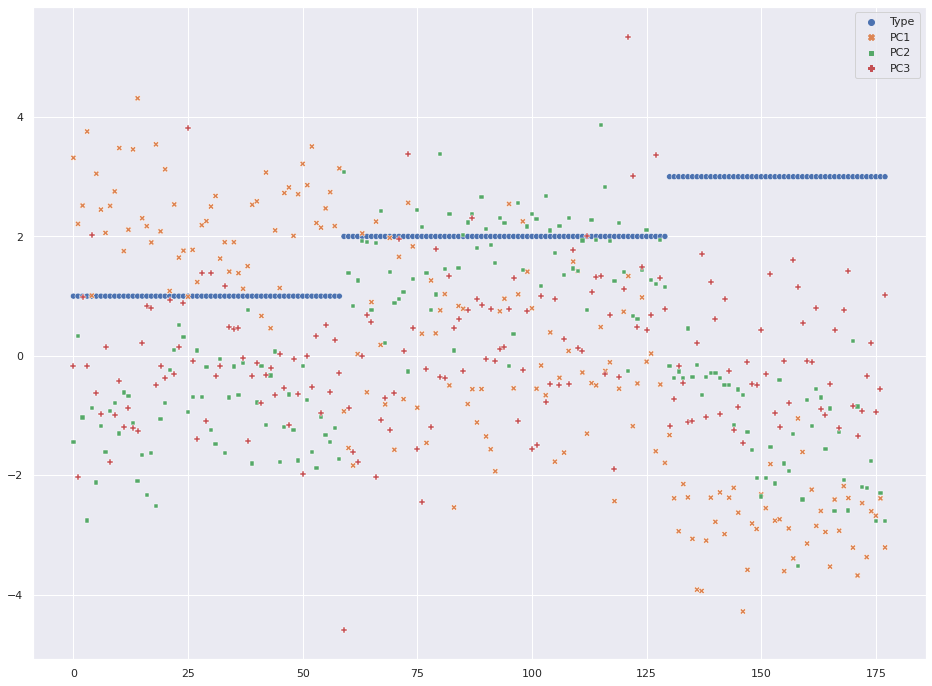

In [22]:
plt.figure(figsize=(16,12))
sns.scatterplot(data=final_df)
plt.show()

#Clustering Algorithms

**1) Hierarchical Clustering**

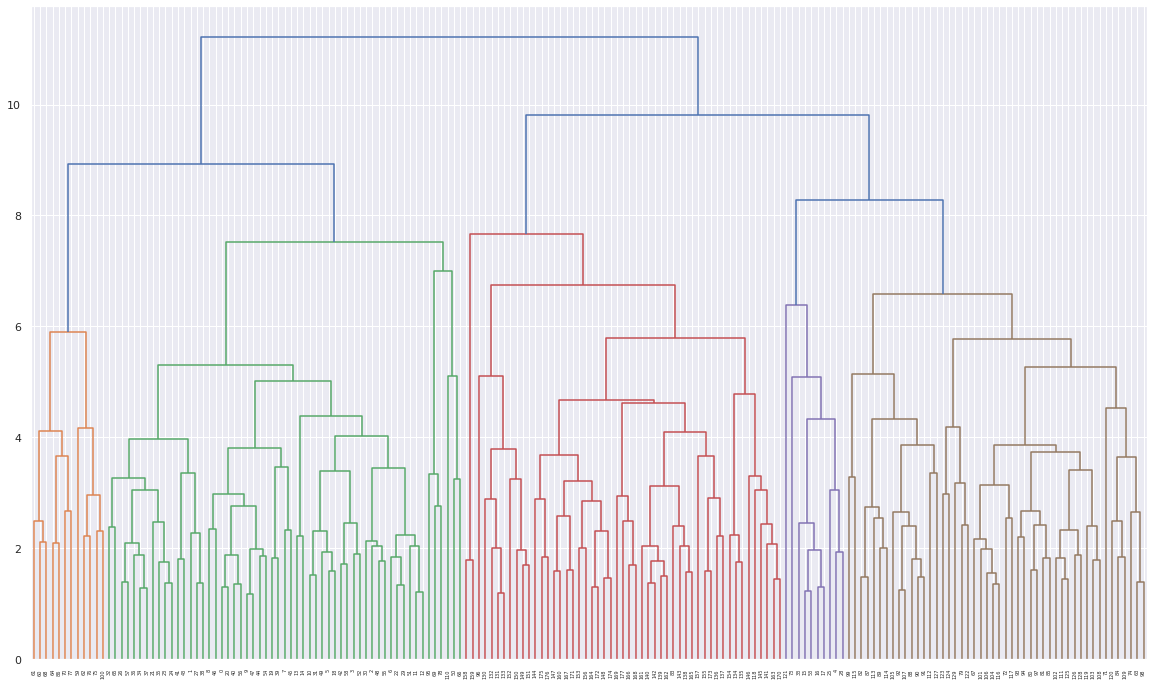

In [23]:
plt.figure(figsize=(20,12))
dendrogram=sch.dendrogram(sch.linkage(array_norm,'complete'))

In [24]:
clusters = AgglomerativeClustering(n_clusters=3,affinity='euclidean')
clusters

AgglomerativeClustering(n_clusters=3)

In [25]:
clusters3 = clusters.fit_predict(array_norm)

In [26]:
y=pd.DataFrame(clusters3,columns=['clusters3id'])
y['clusters3id'].value_counts()

2    64
0    58
1    56
Name: clusters3id, dtype: int64

In [27]:
data3 = raw_data.copy()
data3['clusters3id'] = clusters.labels_
data3

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline,clusters3id
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,2
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,2
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,2
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,2
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740,1
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750,1
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835,1
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840,1


**2) KMeans Clustering**

In [28]:
wcss=[]
for i in range (1,6):
    kmeans=KMeans(n_clusters=i,random_state=2)
    kmeans.fit(array_norm)
    wcss.append(kmeans.inertia_)
    print('Inertia value for k =',i,' is  ',kmeans.inertia_)

Inertia value for k = 1  is   2314.0
Inertia value for k = 2  is   1658.758852429095
Inertia value for k = 3  is   1277.9284888446423
Inertia value for k = 4  is   1175.5045995636679
Inertia value for k = 5  is   1101.6176864100871


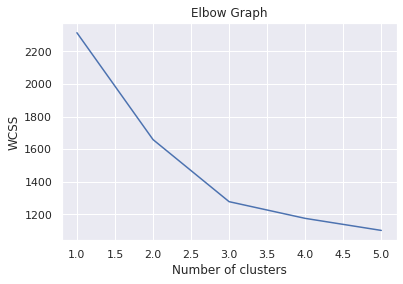

In [29]:
plt.plot(range(1,6),wcss)
plt.title('Elbow Graph')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

Kmeans Clusters for K=3

In [30]:
clusters3 = KMeans(3,random_state=30).fit(array_norm)
clusters3

KMeans(n_clusters=3, random_state=30)

In [31]:
data4 = raw_data.copy()
data4['Kmeans_label'] = clusters3.labels_

In [32]:
data4.groupby('Kmeans_label').agg(['mean'])

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
Kmeans_label,,,,,,,,,,,,,,
0,2.941176,13.134118,3.307255,2.417647,21.241176,98.666667,1.683922,0.818824,0.451961,1.145882,7.234706,0.691961,1.696667,619.058824
1,1.048387,13.676774,1.997903,2.466290,17.462903,107.967742,2.847581,3.003226,0.292097,1.922097,5.453548,1.065484,3.163387,1100.225806
2,2.000000,12.250923,1.897385,2.231231,20.063077,92.738462,2.247692,2.050000,0.357692,1.624154,2.973077,1.062708,2.803385,510.169231


**KMeans Cluster for K=3 on Standardized Data using PCA**

In [33]:
std_pca_df = pd.DataFrame(data=final_df, columns=['PC1','PC2','PC3'])
std_pca_df.head()

,PC1,PC2,PC3
0,3.316751,-1.443463,-0.165739
1,2.209465,0.333393,-2.026457
2,2.516740,-1.031151,0.982819
3,3.757066,-2.756372,-0.176192
4,1.008908,-0.869831,2.026688


In [34]:
model_kmeans = KMeans(n_clusters=3, random_state=0, init='k-means++')
y_predict_kmeans = model_kmeans.fit_predict(std_pca_df)
y_predict_kmeans.shape

(178,)

In [35]:
model_kmeans.labels_

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0], dtype=int32)

In [36]:
model_kmeans.inertia_

512.9995067661507

In [37]:
# Cluster centres
model_kmeans.cluster_centers_

array([[-2.72003575e+00, -1.12565126e+00, -2.39093241e-01],
       [-7.27201401e-02,  1.77754410e+00,  1.92644149e-01],
       [ 2.27580813e+00, -8.94517592e-01, -2.15032202e-03]])

In [38]:
data['Kmeans_label'] = model_kmeans.labels_

In [39]:
data.groupby('Kmeans_label').agg(['mean'])

,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
Kmeans_label,,,,,,,,,,,,,
0,13.134118,3.307255,2.417647,21.241176,98.666667,1.683922,0.818824,0.451961,1.145882,7.234706,0.691961,1.696667,619.058824
1,12.249062,1.910313,2.233281,20.087500,92.812500,2.227813,2.023438,0.359531,1.619063,2.949219,1.063063,2.803906,507.828125
2,13.656032,1.983175,2.460476,17.479365,107.650794,2.858254,3.015079,0.291270,1.922540,5.438413,1.065079,3.157143,1093.238095


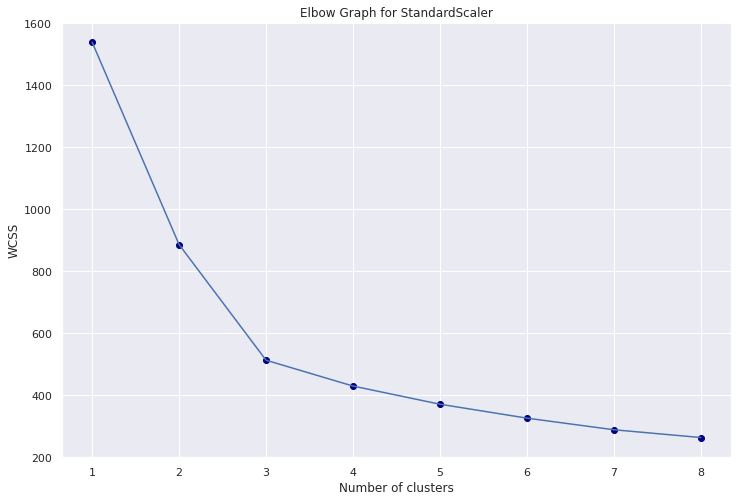

In [40]:
wcss=[]
for i in range (1,9):
    kmeans=KMeans(n_clusters=i,random_state=2)
    kmeans.fit(std_pca_df)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(12,8))    
plt.plot(range(1,9),wcss)
plt.scatter(range(1,9),wcss,color='navy')
plt.title('Elbow Graph for StandardScaler')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

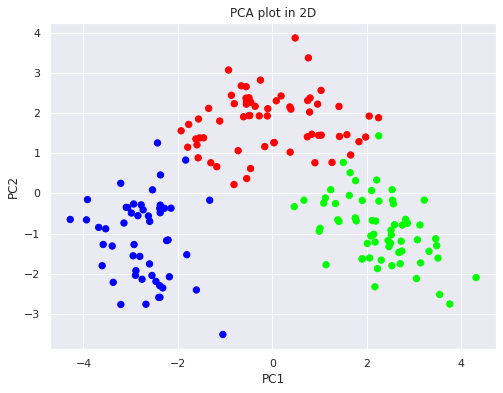

In [41]:
plt.figure(figsize=(8,6))

# Scatterplot
plt.scatter(std_pca_df.iloc[:,0], std_pca_df.iloc[:,1], c=data['Kmeans_label'], cmap="brg", s=40)

# Aesthetics
plt.title('PCA plot in 2D')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

**KMeans Cluster for K=3 on Normalized Data using PCA**

In [42]:
# Applying PCA Fit Transform to dataset
pca = PCA(n_components=13)

wine_pca = pca.fit_transform(data_nor)
wine_pca

array([[-0.70633576, -0.25319275,  0.02409269, ...,  0.04971144,
        -0.02001158, -0.00872296],
       [-0.4849768 , -0.00882289, -0.28048205, ...,  0.07415784,
        -0.05083753, -0.00524944],
       [-0.52117227, -0.18918722,  0.19621674, ...,  0.0121311 ,
        -0.10418449, -0.02316441],
       ...,
       [ 0.62631289, -0.54685701, -0.03049476, ...,  0.13116697,
         0.11160576,  0.0389133 ],
       [ 0.5729911 , -0.42551609, -0.09453672, ...,  0.03027458,
         0.05732893,  0.01103053],
       [ 0.701764  , -0.51350498,  0.29390996, ..., -0.02784028,
         0.01873501, -0.06648261]])

In [43]:
var = pca.explained_variance_ratio_
var

array([0.40749485, 0.18970352, 0.08561671, 0.07426678, 0.05565301,
       0.04658837, 0.03663929, 0.02408789, 0.02274371, 0.02250965,
       0.01381292, 0.01273236, 0.00815095])

In [44]:
# Cummulative variance of each PCA
var1 = np.cumsum(np.round(var,4)*100)
var1

array([ 40.75,  59.72,  68.28,  75.71,  81.28,  85.94,  89.6 ,  92.01,
        94.28,  96.53,  97.91,  99.18, 100.  ])

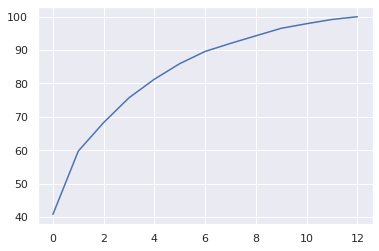

In [45]:
plt.plot(var1)

In [46]:
final_df = pd.concat([raw_data['Type'],pd.DataFrame(wine_pca[:,0:3],columns=['PC1','PC2','PC3'])],axis=1)
final_df.head()

,Type,PC1,PC2,PC3
0,1,-0.706336,-0.253193,0.024093
1,1,-0.484977,-0.008823,-0.280482
2,1,-0.521172,-0.189187,0.196217
3,1,-0.821644,-0.580906,0.081110
4,1,-0.202546,-0.059467,0.300240


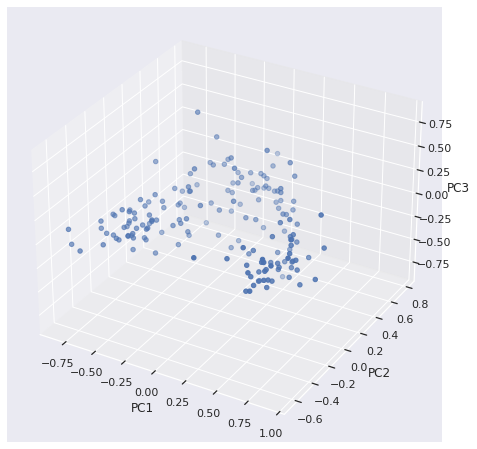

In [47]:
from mpl_toolkits.mplot3d import Axes3D

sns.set(style = "darkgrid")

fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111, projection = '3d')

x = final_df['PC1']
y = final_df['PC2']
z = final_df['PC3']

ax.set_xlabel("PC1")
ax.set_ylabel("PC2")
ax.set_zlabel("PC3")

ax.scatter(x, y, z)

plt.show()

In [48]:
nor_pca_df = pd.DataFrame(data=final_df, columns=['PC1','PC2','PC3'])
nor_pca_df.head()

,PC1,PC2,PC3
0,-0.706336,-0.253193,0.024093
1,-0.484977,-0.008823,-0.280482
2,-0.521172,-0.189187,0.196217
3,-0.821644,-0.580906,0.081110
4,-0.202546,-0.059467,0.300240


In [49]:
model_kmeans = KMeans(n_clusters=3, random_state=0, init='k-means++')
y_predict_kmeans = model_kmeans.fit_predict(nor_pca_df)
y_predict_kmeans.shape

(178,)

In [50]:
model_kmeans.labels_

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 0, 1, 1, 1, 1,
       2, 1, 1, 1, 1, 2, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0], dtype=int32)

In [51]:
model_kmeans.inertia_

18.938260830466444

In [52]:
# Cluster centres
model_kmeans.cluster_centers_

array([[ 0.59750634, -0.21895939, -0.01057291],
       [ 0.01701227,  0.36612572,  0.01352436],
       [-0.48503975, -0.17742871, -0.0046045 ]])

In [53]:
data['Kmeans_label'] = model_kmeans.labels_

In [54]:
data.groupby('Kmeans_label').agg(['mean'])

,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
Kmeans_label,,,,,,,,,,,,,
0,13.134118,3.307255,2.417647,21.241176,98.666667,1.683922,0.818824,0.451961,1.145882,7.234706,0.691961,1.696667,619.058824
1,12.202742,1.946774,2.249839,20.211290,93.451613,2.200806,2.038710,0.369032,1.607903,2.949355,1.056387,2.801129,502.709677
2,13.656923,1.946154,2.437692,17.441538,106.584615,2.864615,2.970000,0.284308,1.923846,5.361692,1.071385,3.148923,1080.107692


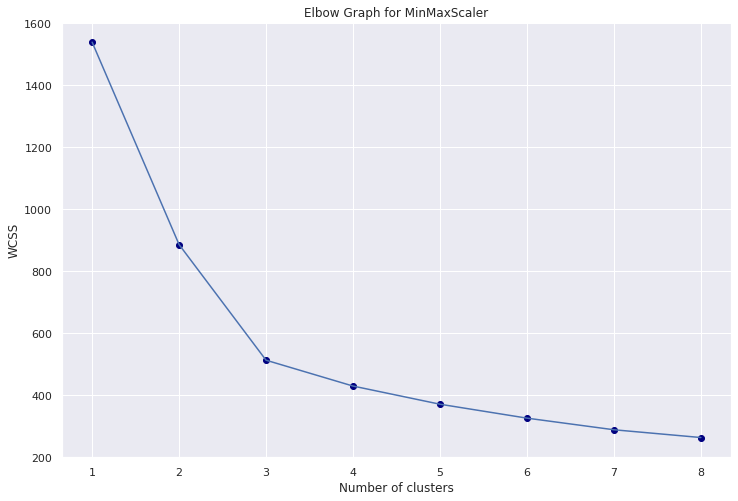

In [55]:
wcss=[]
for i in range (1,9):
    kmeans=KMeans(n_clusters=i,random_state=2)
    kmeans.fit(std_pca_df)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(12,8))    
plt.plot(range(1,9),wcss)
plt.scatter(range(1,9),wcss,color='navy')
plt.title('Elbow Graph for MinMaxScaler')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

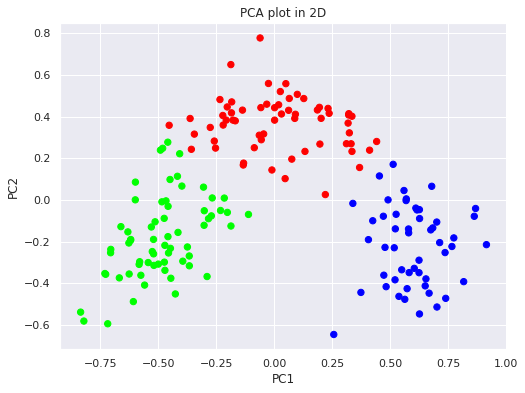

In [56]:
plt.figure(figsize=(8,6))

# Scatterplot
plt.scatter(nor_pca_df.iloc[:,0], nor_pca_df.iloc[:,1], c=data['Kmeans_label'], cmap="brg", s=40)

# Aesthetics
plt.title('PCA plot in 2D')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

In [57]:
data1 = data.copy()
data1['Cluster'] = model_kmeans.labels_

In [58]:
cluster1 = pd.DataFrame(data1.loc[data1.Cluster==0].mean(),columns= ['Cluster1_avg'])
cluster2 = pd.DataFrame(data1.loc[data1.Cluster==1].mean(),columns= ['Cluster2_avg'])
cluster3 = pd.DataFrame(data1.loc[data1.Cluster==2].mean(),columns= ['Cluster2_avg'])

In [59]:
avg_data1 = pd.concat([cluster1,cluster2,cluster3],axis=1)
avg_data1

,Cluster1_avg,Cluster2_avg,Cluster2_avg
Alcohol,13.134118,12.202742,13.656923
Malic,3.307255,1.946774,1.946154
Ash,2.417647,2.249839,2.437692
Alcalinity,21.241176,20.211290,17.441538
Magnesium,98.666667,93.451613,106.584615
Phenols,1.683922,2.200806,2.864615
Flavanoids,0.818824,2.038710,2.970000
Nonflavanoids,0.451961,0.369032,0.284308
Proanthocyanins,1.145882,1.607903,1.923846
Color,7.234706,2.949355,5.361692


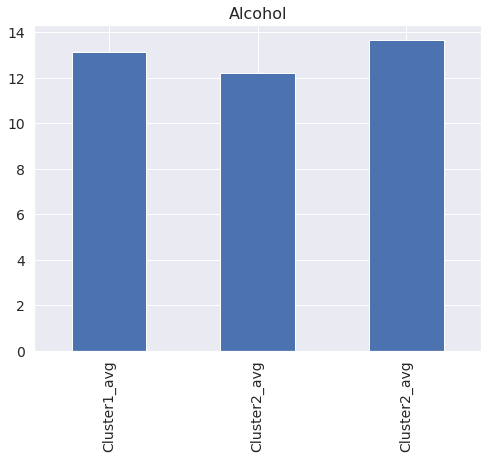

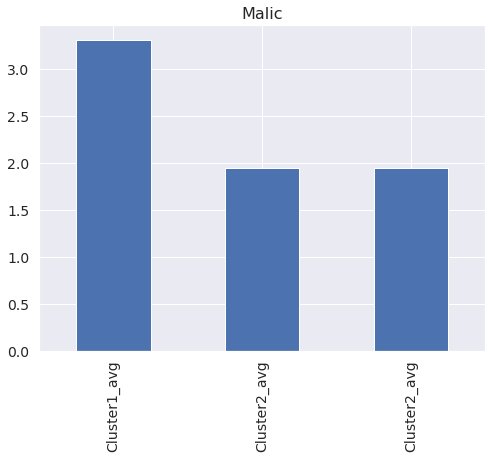

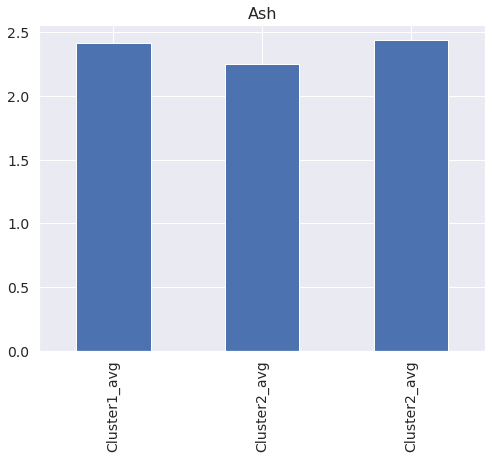

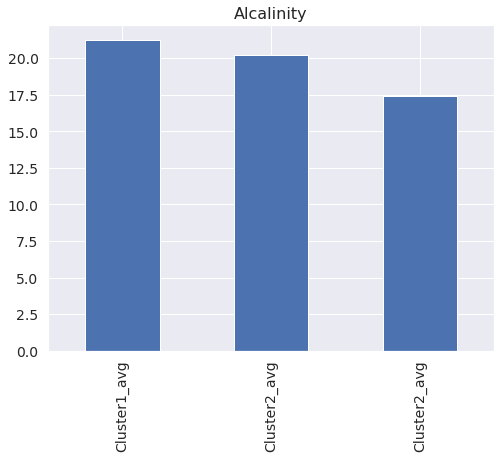

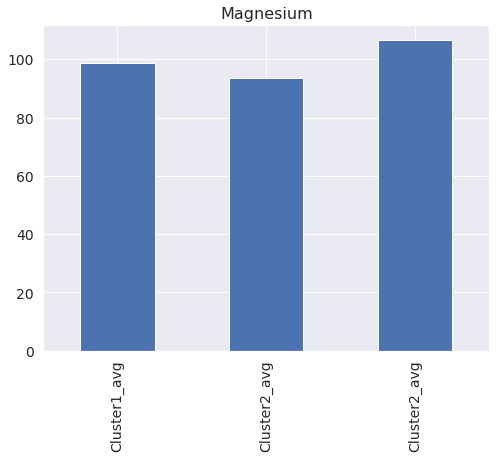

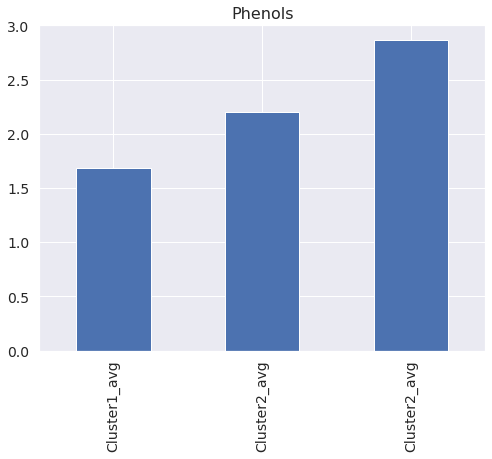

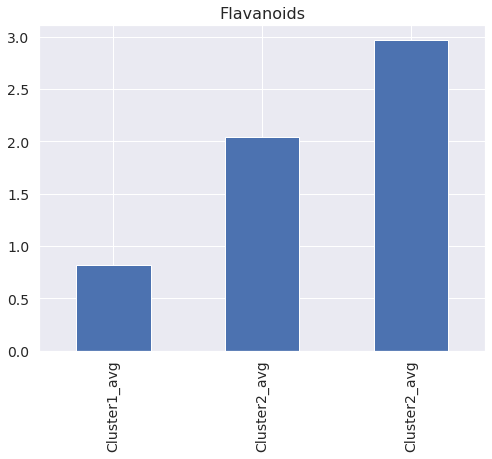

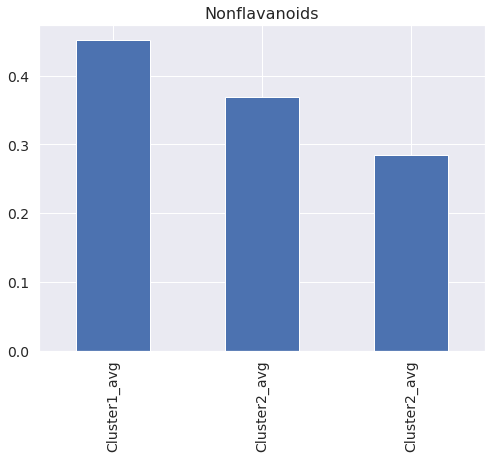

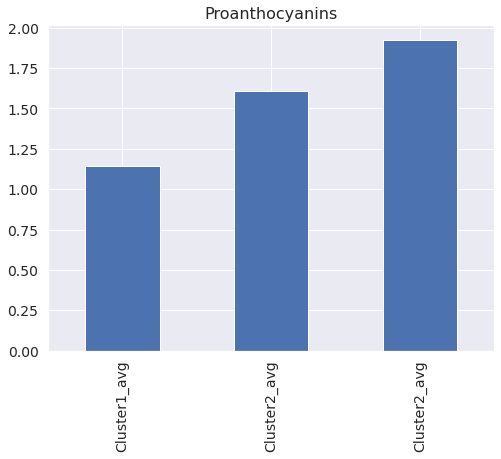

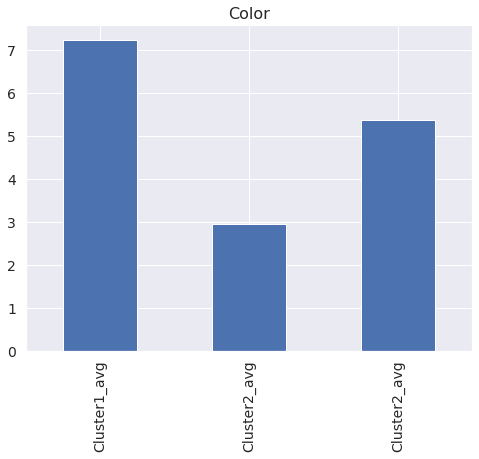

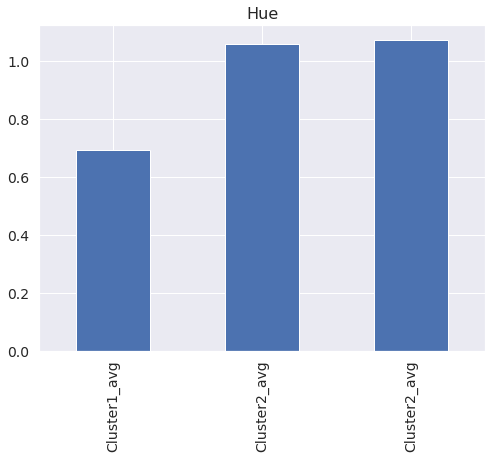

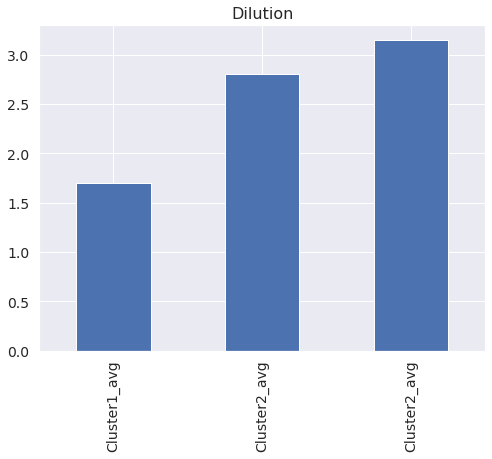

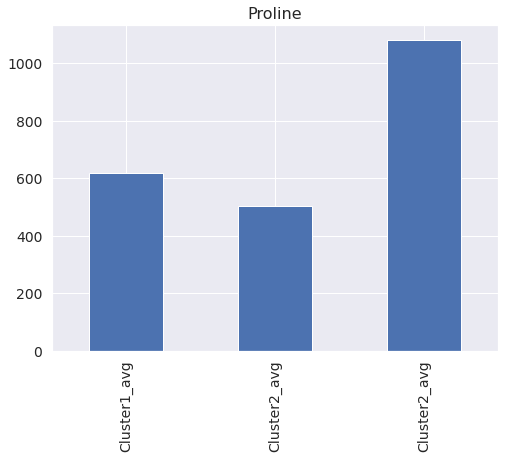

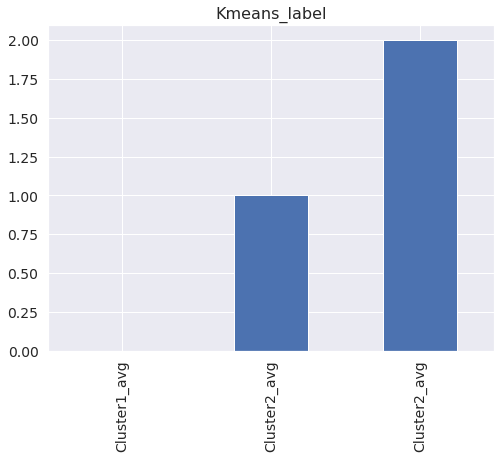

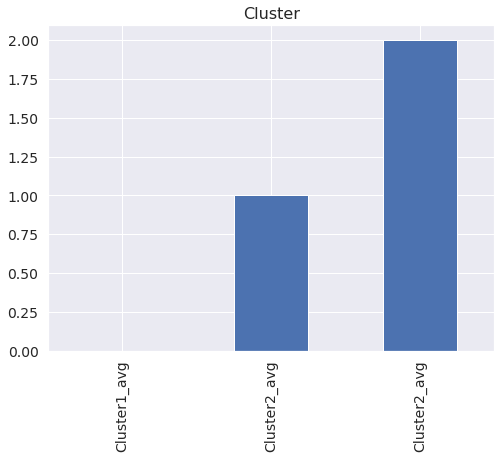

In [60]:
for i , row in avg_data1.iterrows():
    fig = plt.subplots(figsize=(8,6))
    j = avg_data1.xs(i ,axis = 0)
    plt.title(i, fontsize=16)
    j.plot(kind='bar',fontsize=14)
    plt.show()

#Hierarchical Clustering Algorithm

**1) Dendrogram for Standardized Data**

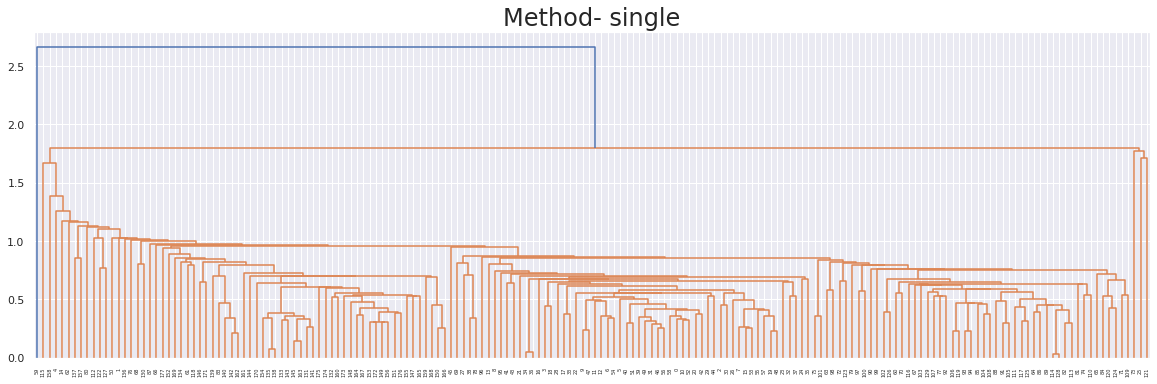

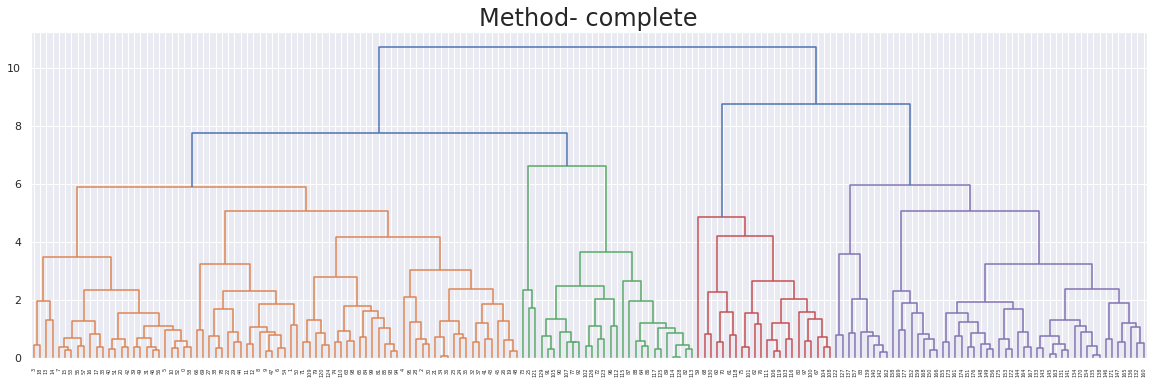

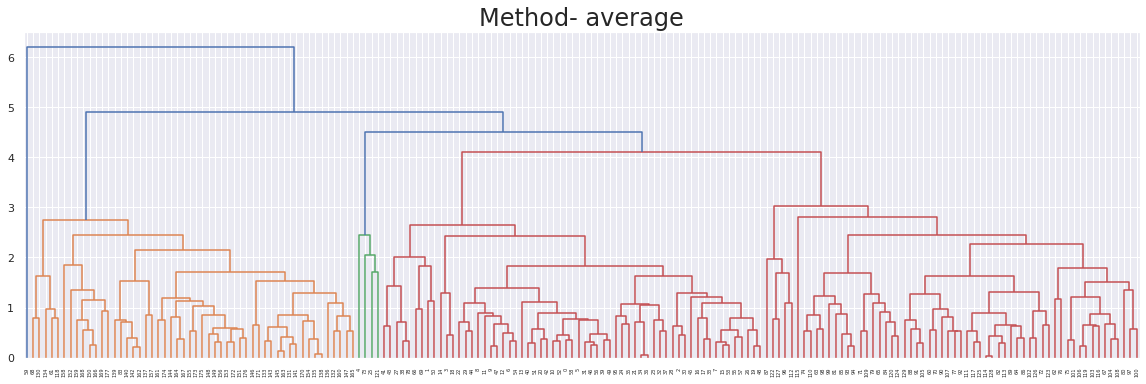

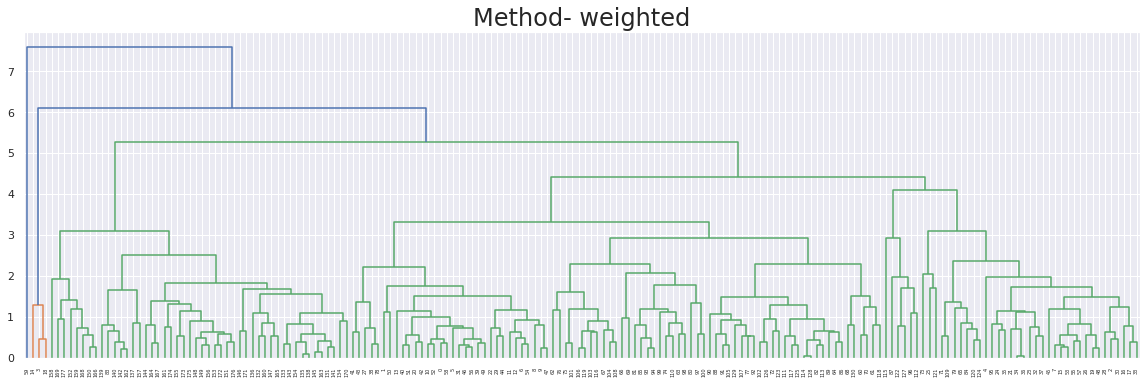

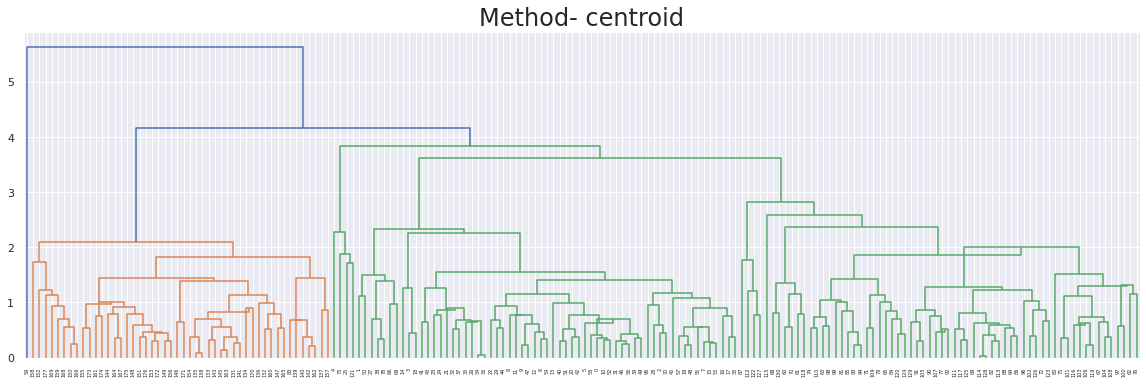

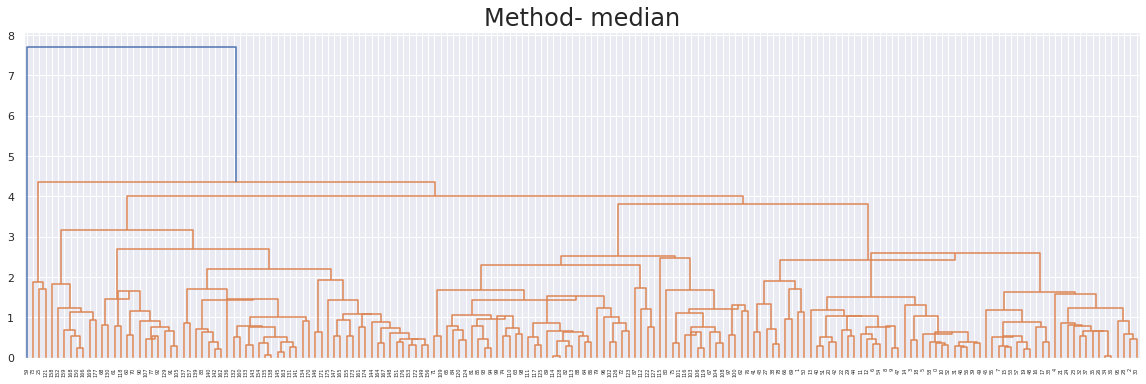

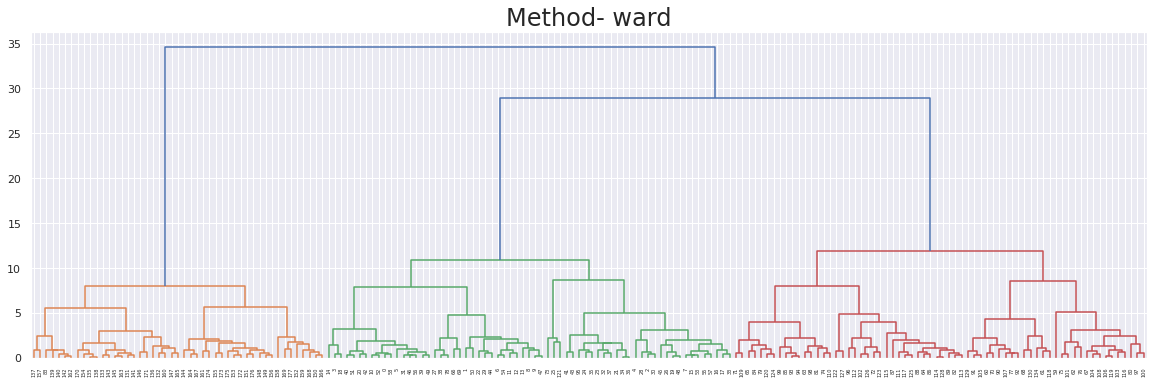

In [61]:
for methods in ['single','complete','average','weighted','centroid','median','ward']: 
    plt.figure(figsize =(20, 6)) 
    
    dict = {'fontsize':24}
    
    plt.title('Method- {}'.format(methods),fontdict = dict) 
    Dendrogram1 = sch.dendrogram(sch.linkage(std_pca_df, method = methods,optimal_ordering=False))

**2) Dendrogram for Normalized Data**

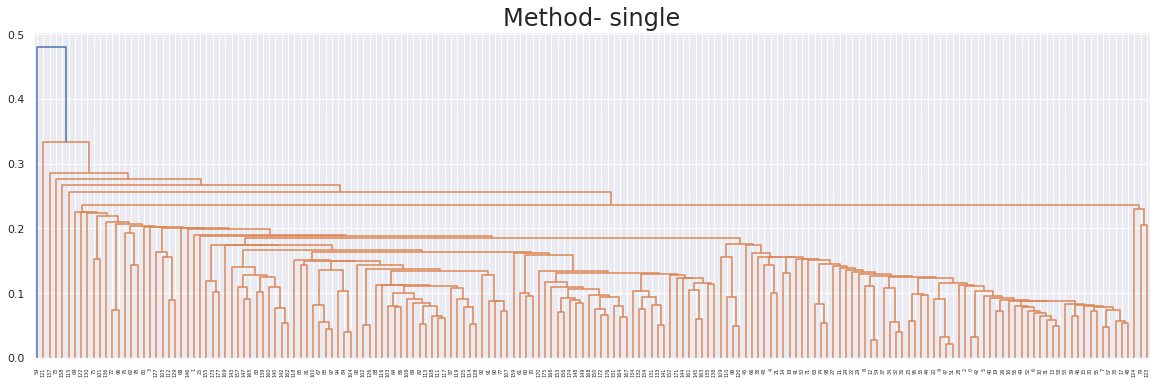

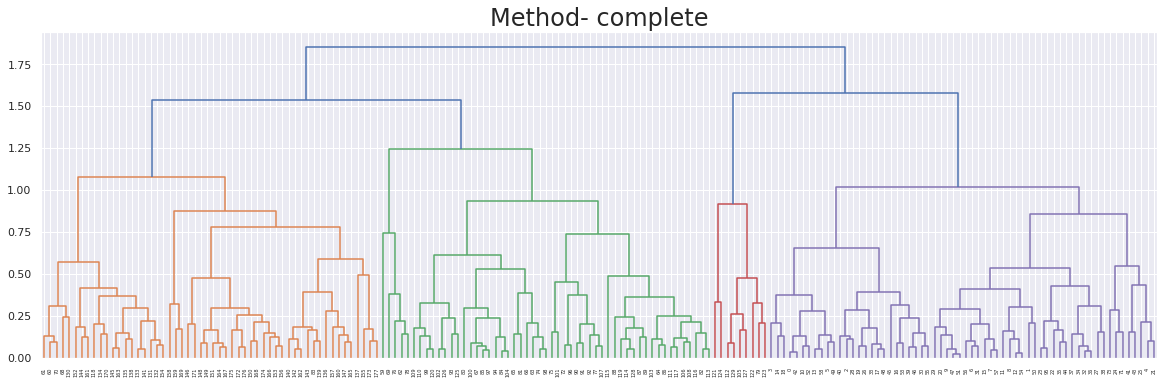

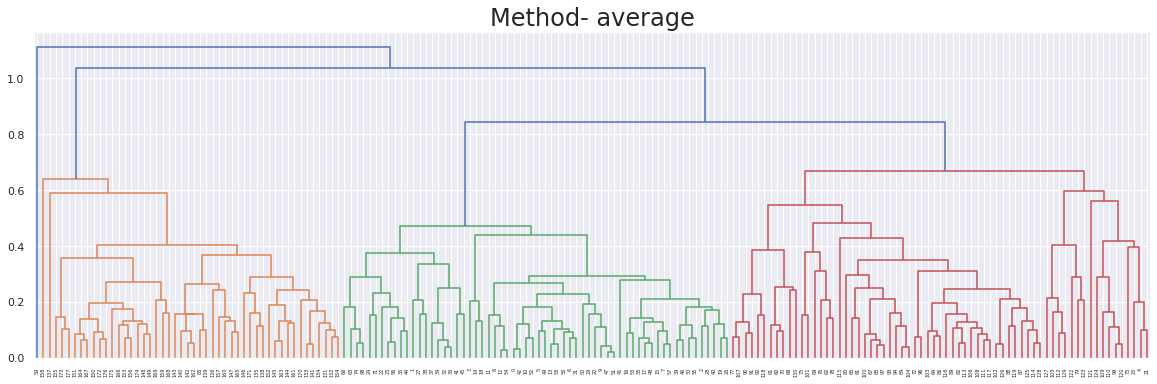

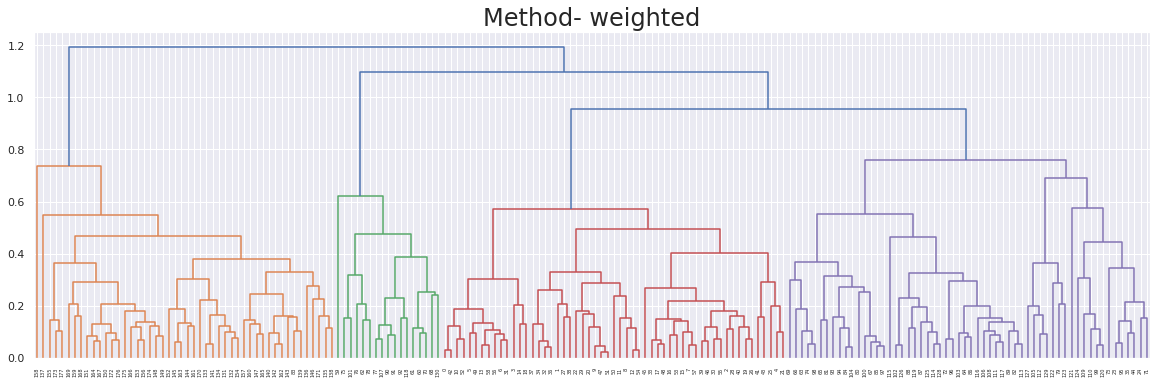

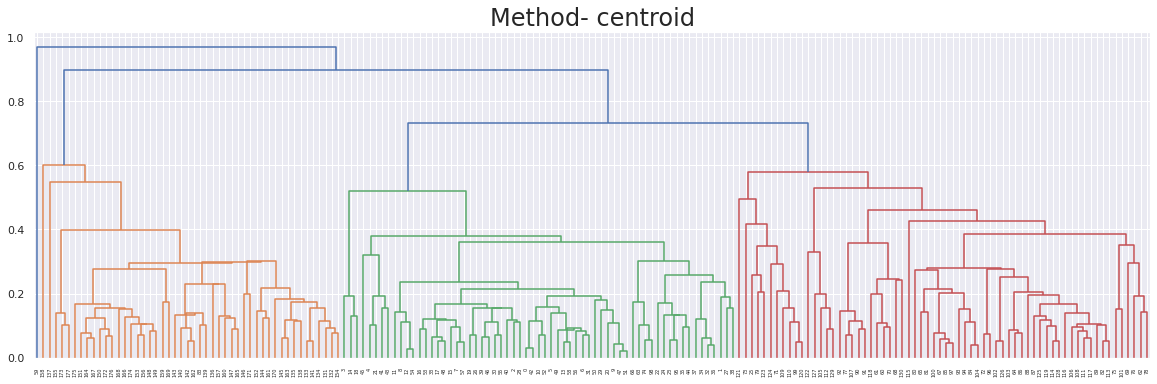

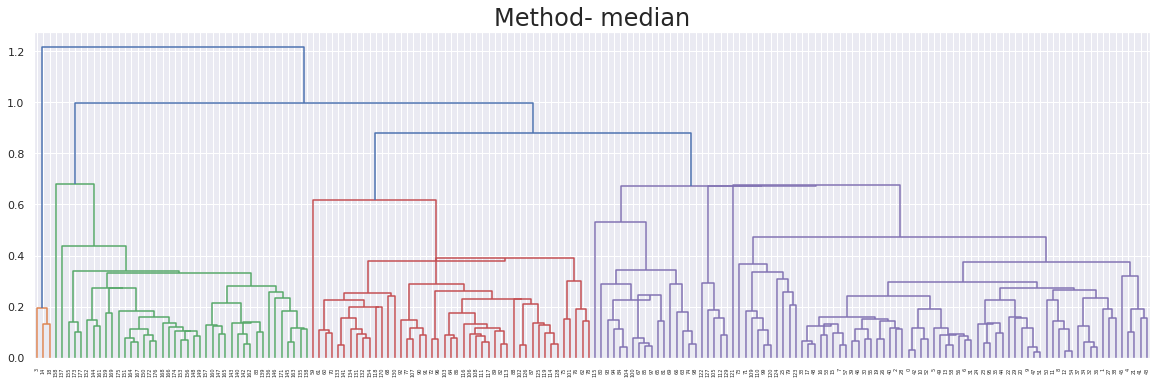

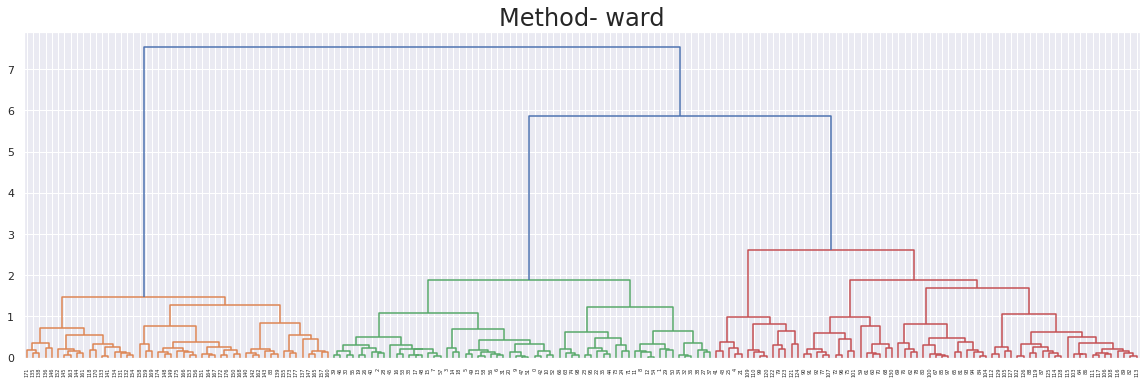

In [62]:
for methods in ['single','complete','average','weighted','centroid','median','ward']: 
    plt.figure(figsize =(20, 6)) 
    
    dict = {'fontsize':24}
    
    plt.title('Method- {}'.format(methods),fontdict = dict) 
    Dendrogram1 = sch.dendrogram(sch.linkage(nor_pca_df, method = methods,optimal_ordering=False))

**1) For Standardized Data**

In [63]:
agg_clustering = AgglomerativeClustering(n_clusters=3, linkage='complete', affinity='l1')
y_pred_hie = agg_clustering.fit_predict(std_pca_df)
y_pred_hie

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 1, 2, 0, 2, 0,
       0, 2, 1, 0, 1, 0, 2, 0, 0, 2, 2, 1, 0, 0, 2, 2, 2, 1, 0, 2, 2, 2,
       1, 2, 1, 1, 1, 2, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2, 2, 1, 2, 1, 2, 0,
       0, 2, 1, 2, 2, 2, 2, 2, 1, 2, 0, 0, 1, 2, 0, 2, 2, 1, 2, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1])

In [64]:
df['Hierarchical_labels'] = agg_clustering.labels_
df.head()

,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline,Hierarchical_labels
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,0
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,0
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,0
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,0
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,0


In [65]:
df.groupby('Hierarchical_labels').agg(['mean'])

,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
Hierarchical_labels,,,,,,,,,,,,,
0,13.399481,1.984416,2.423636,17.797403,106.246753,2.839091,2.936104,0.287792,2.000649,5.056234,1.064675,3.130649,998.363636
1,12.941538,3.076615,2.418462,21.215385,97.538462,1.706154,0.986769,0.465846,1.182154,6.314462,0.756400,1.854615,604.584615
2,12.254167,1.752500,2.150556,20.019444,89.805556,2.195000,1.971944,0.332500,1.452500,2.793611,1.091111,2.868611,465.972222


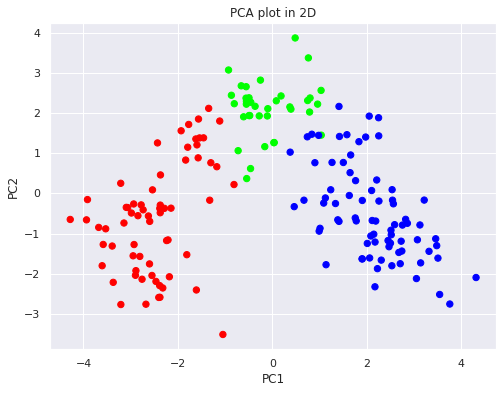

In [66]:
plt.figure(figsize=(8,6))

# Scatterplot
plt.scatter(std_pca_df.iloc[:,0], std_pca_df.iloc[:,1], c=df['Hierarchical_labels'], cmap="brg", s=40)

# Aesthetics
plt.title('PCA plot in 2D')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

In [67]:
df1 = df.copy()
df1.rename({"Hierarchical_labels":'Cluster'}, axis=1,inplace=True)

In [68]:
cluster1 = pd.DataFrame(df1.loc[df1.Cluster==0].mean(),columns= ['Cluster1_avg'])
cluster2 = pd.DataFrame(df1.loc[df1.Cluster==1].mean(),columns= ['Cluster2_avg'])
cluster3 = pd.DataFrame(df1.loc[df1.Cluster==2].mean(),columns= ['Cluster3_avg'])

In [69]:
avg_df = pd.concat([cluster1,cluster2,cluster3],axis=1)
avg_df

,Cluster1_avg,Cluster2_avg,Cluster3_avg
Alcohol,13.399481,12.941538,12.254167
Malic,1.984416,3.076615,1.752500
Ash,2.423636,2.418462,2.150556
Alcalinity,17.797403,21.215385,20.019444
Magnesium,106.246753,97.538462,89.805556
Phenols,2.839091,1.706154,2.195000
Flavanoids,2.936104,0.986769,1.971944
Nonflavanoids,0.287792,0.465846,0.332500
Proanthocyanins,2.000649,1.182154,1.452500
Color,5.056234,6.314462,2.793611


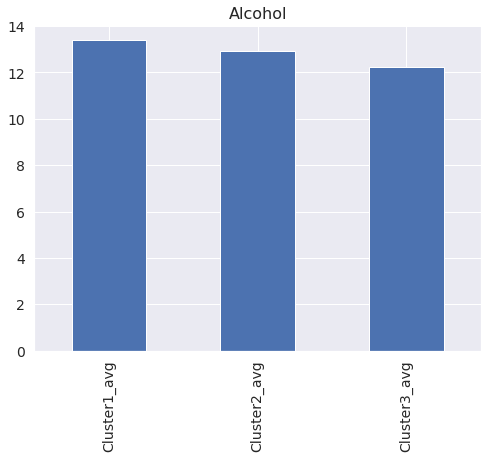

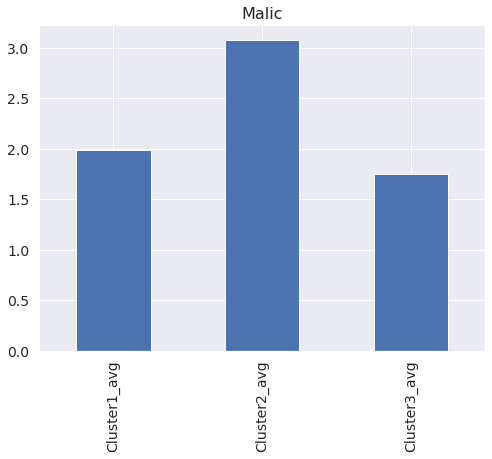

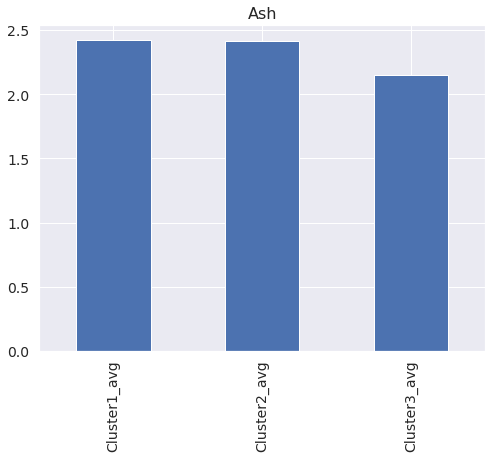

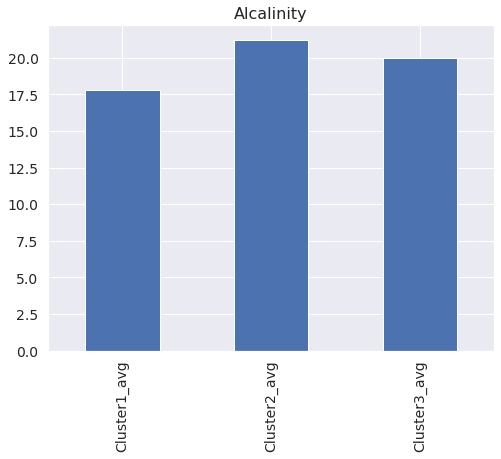

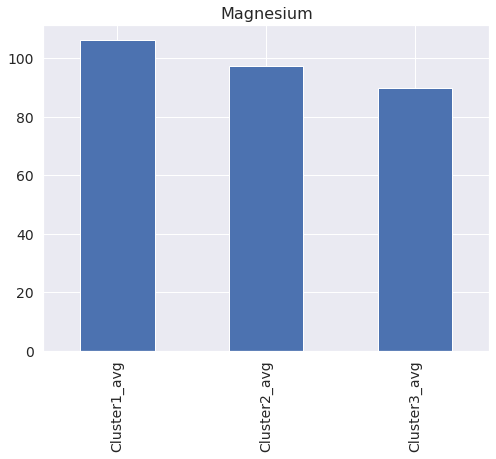

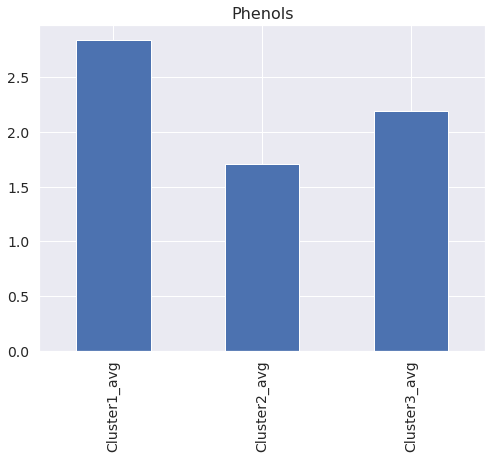

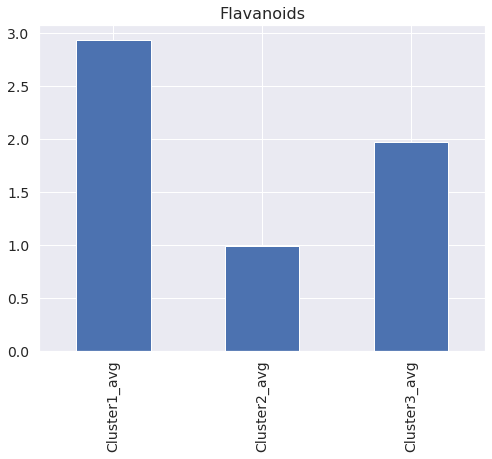

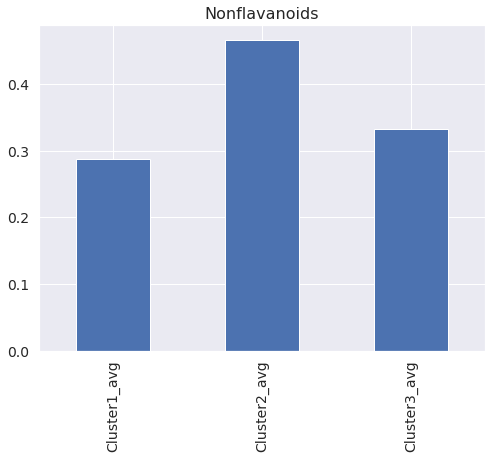

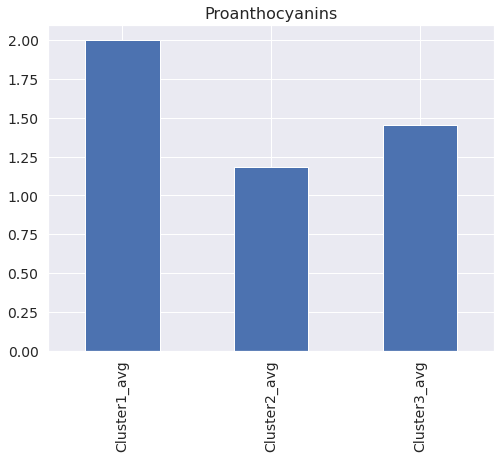

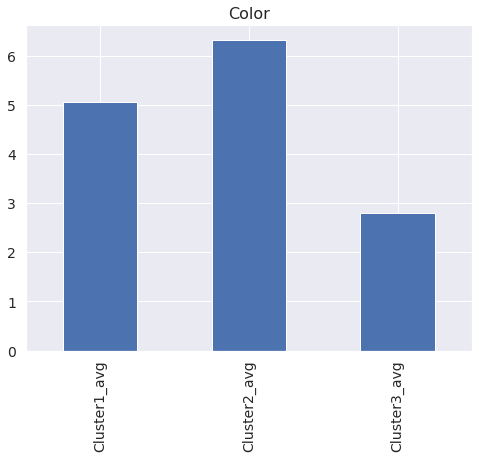

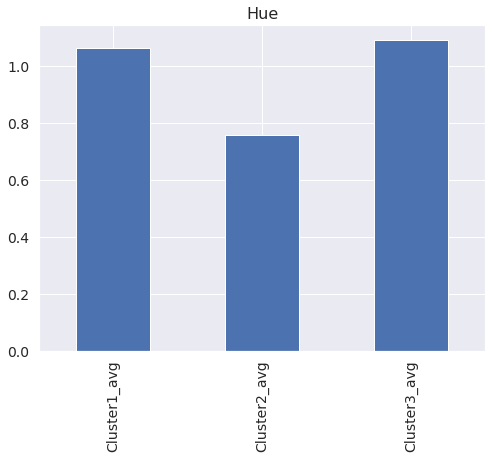

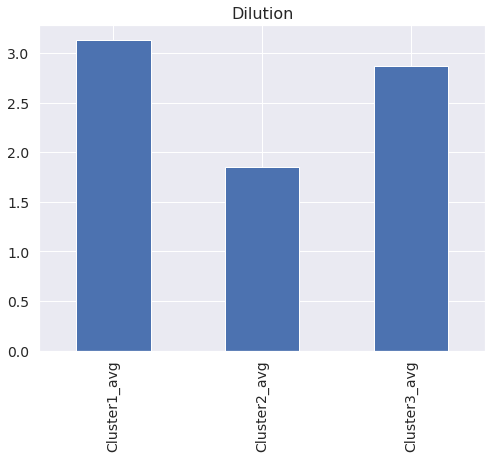

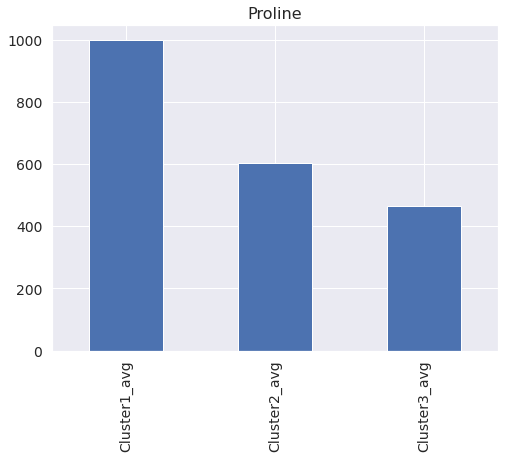

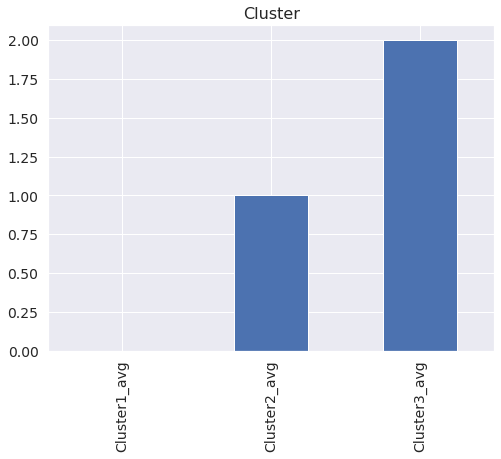

In [70]:
for i , row in avg_df.iterrows():
    fig = plt.subplots(figsize=(8,6))
    j = avg_df.xs(i ,axis = 0)
    plt.title(i, fontsize=16)
    j.plot(kind='bar',fontsize=14)
    plt.show()

**2) For Normalized Data**

In [71]:
agg_clustering = AgglomerativeClustering(n_clusters=3, linkage='complete', affinity='l1')
y_pred_hie = agg_clustering.fit_predict(nor_pca_df)
y_pred_hie

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

In [72]:
df['Hierarchical_labels'] = agg_clustering.labels_
df.head()

,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline,Hierarchical_labels
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,0


In [73]:
df.groupby('Hierarchical_labels').agg(['mean'])

,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
Hierarchical_labels,,,,,,,,,,,,,
0,12.346901,2.052958,2.289155,20.333803,95.802817,2.232535,2.076761,0.364085,1.596056,3.116479,1.049099,2.807324,540.183099
1,13.674828,1.795690,2.409483,16.860345,105.896552,2.890862,3.011379,0.280172,1.947931,5.516379,1.075690,3.136379,1105.206897
2,13.149796,3.386939,2.427755,21.397959,98.163265,1.680612,0.797959,0.455306,1.160816,7.328980,0.684694,1.707143,622.285714


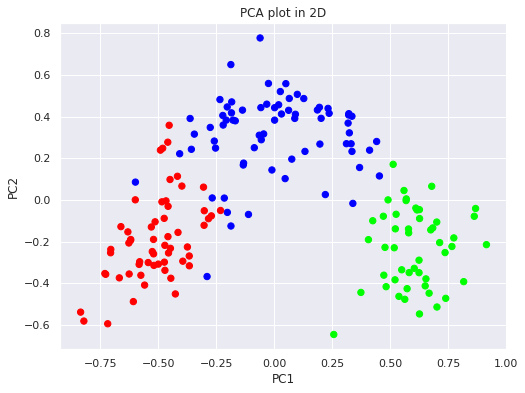

In [74]:
plt.figure(figsize=(8,6))

# Scatterplot
plt.scatter(nor_pca_df.iloc[:,0], nor_pca_df.iloc[:,1], c=df['Hierarchical_labels'], cmap="brg", s=40)

# Aesthetics
plt.title('PCA plot in 2D')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

In [75]:
df1 = df.copy()
df1.rename({"Hierarchical_labels":'Cluster'}, axis=1,inplace=True)

In [76]:
cluster1 = pd.DataFrame(df1.loc[df1.Cluster==0].mean(),columns= ['Cluster1_avg'])
cluster2 = pd.DataFrame(df1.loc[df1.Cluster==1].mean(),columns= ['Cluster2_avg'])
cluster3 = pd.DataFrame(df1.loc[df1.Cluster==2].mean(),columns= ['Cluster3_avg'])

In [77]:
avg_df = pd.concat([cluster1,cluster2,cluster3],axis=1)
avg_df

,Cluster1_avg,Cluster2_avg,Cluster3_avg
Alcohol,12.346901,13.674828,13.149796
Malic,2.052958,1.795690,3.386939
Ash,2.289155,2.409483,2.427755
Alcalinity,20.333803,16.860345,21.397959
Magnesium,95.802817,105.896552,98.163265
Phenols,2.232535,2.890862,1.680612
Flavanoids,2.076761,3.011379,0.797959
Nonflavanoids,0.364085,0.280172,0.455306
Proanthocyanins,1.596056,1.947931,1.160816
Color,3.116479,5.516379,7.328980


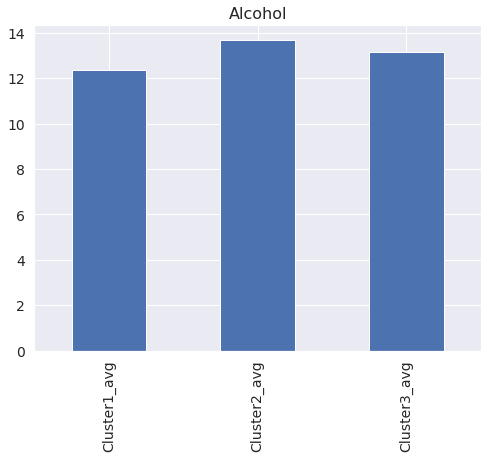

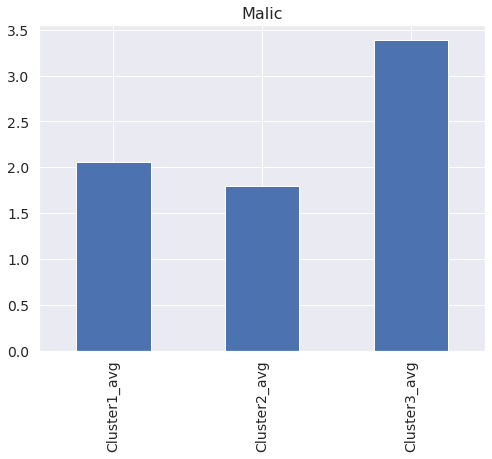

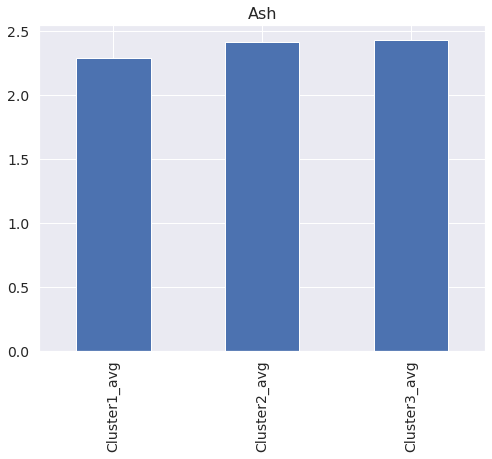

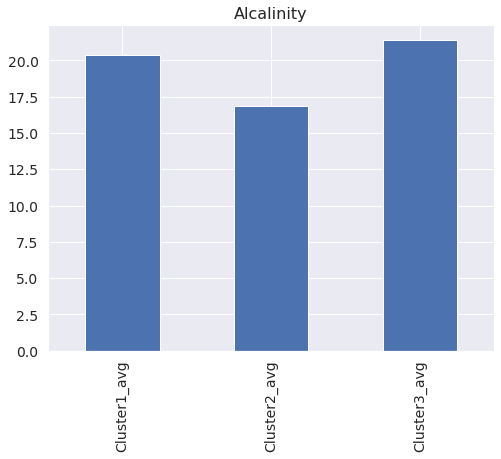

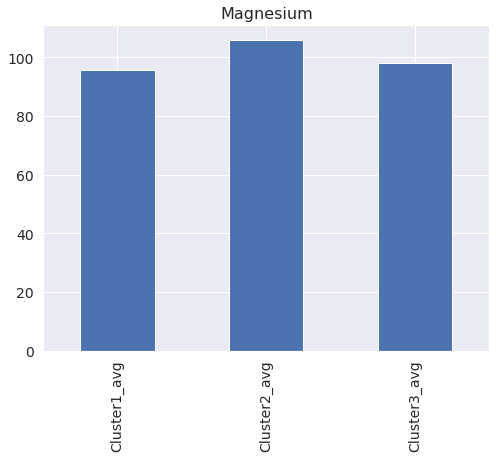

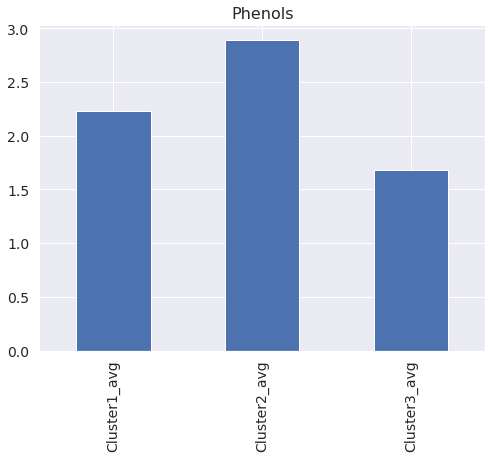

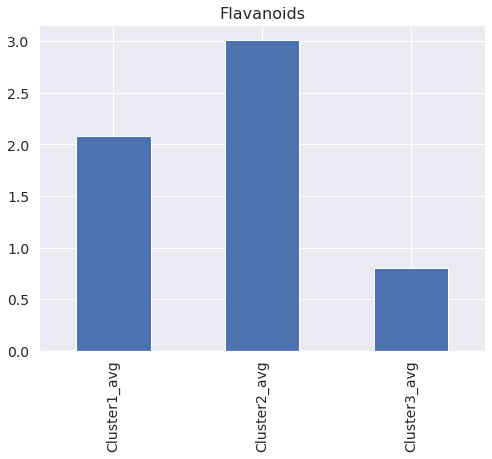

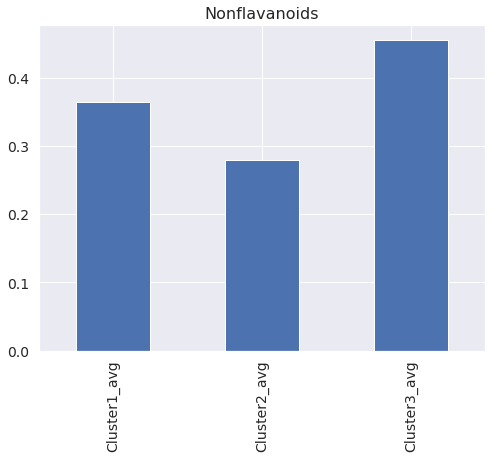

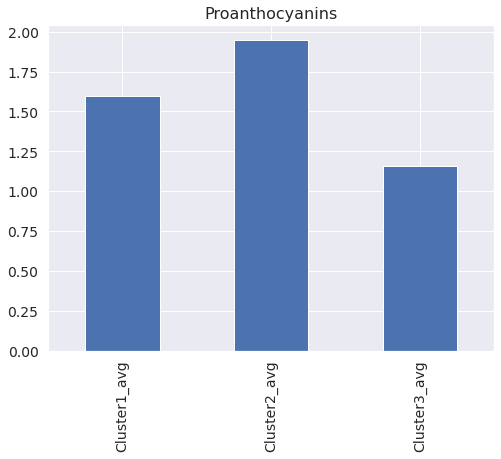

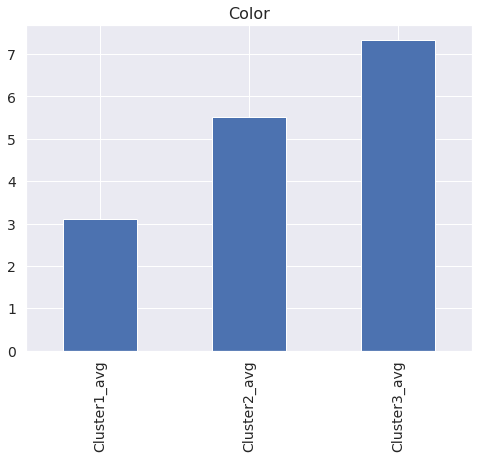

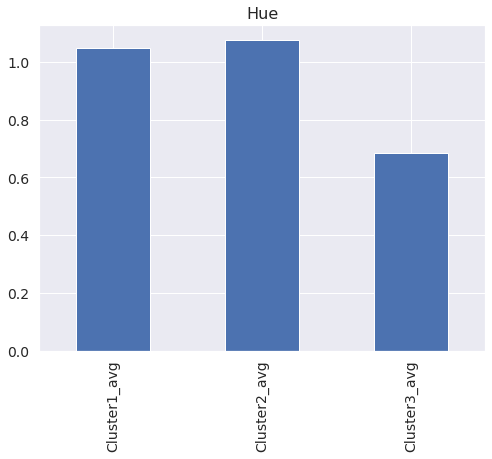

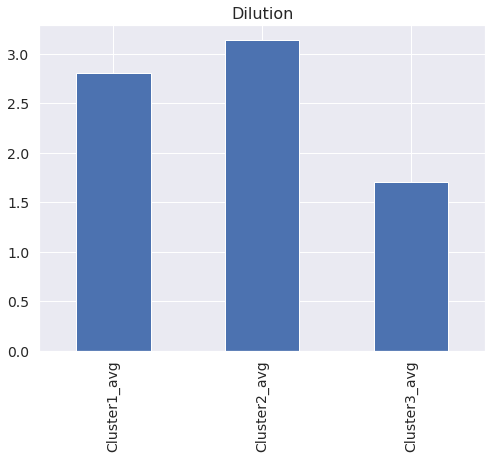

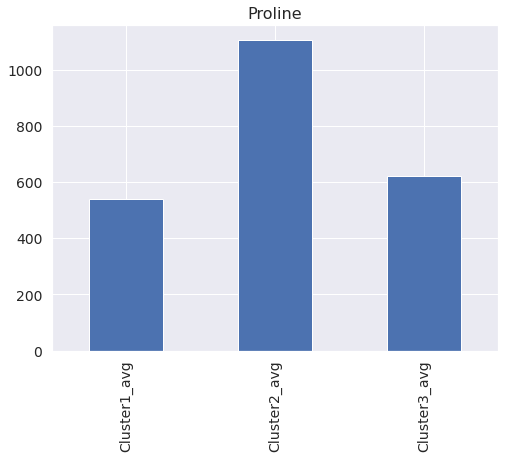

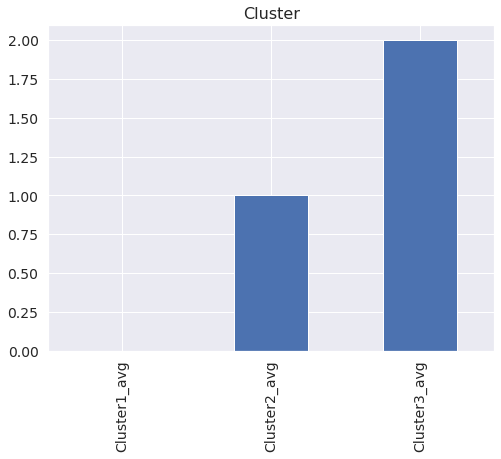

In [78]:
for i , row in avg_df.iterrows():
    fig = plt.subplots(figsize=(8,6))
    j = avg_df.xs(i ,axis = 0)
    plt.title(i, fontsize=16, fontweight=20)
    j.plot(kind='bar',fontsize=14)
    plt.show()
    print()

#Conclusion

I have used & analyzed two clustering techniques here..i) KMeans ii) Hierarchical Clustering

1.   **Clustering in KMeans was found to be more better distributed among the 3 clusters.**
2.   **PCA obtained with differrent transformation data shows fluctuation in model score.**
3.   **So finally the MinMaxScaler showed best results and Standard Scaler showed less score so is not used for further model building.**


 
